# Controlling Burgers' Equation with Reinforcement Learning
This notebook will present the results of using reinforcement learning to control Burgers' equation, a nonlinear PDE. The approach uses the reinforcement learning framework [stable_baselines3](https://github.com/DLR-RM/stable-baselines3).

In [2]:
%load_ext autoreload
%autoreload 2
import sys; sys.path.append('../../'); sys.path.append('../envs'); sys.path.append('../../PDE-Control/PhiFlow'); sys.path.append('../../PDE-Control/src')
from phi.flow import *
import matplotlib.pyplot as plt
import burgers_plots as bplt
from experiment import BurgersTraining

/home/felix/anaconda3/envs/phiflow/lib/python3.6/site-packages/tensorboard/compat/tensorflow_stub/dtypes.py:541: FutureWarning:

Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.

/home/felix/anaconda3/envs/phiflow/lib/python3.6/site-packages/tensorboard/compat/tensorflow_stub/dtypes.py:542: FutureWarning:

Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.

/home/felix/anaconda3/envs/phiflow/lib/python3.6/site-packages/tensorboard/compat/tensorflow_stub/dtypes.py:543: FutureWarning:

Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.

/home/felix/anaconda3/envs/phiflow/lib/python3.6/site-packages/tensorboard/compat/tensorflow_stub/dtypes.py:544: FutureWarning:

Passing (type, 1) or '1type' as a synony

## Reinforcement Learning Initialization

In [3]:
domain = Domain([32], box=box[0:1]) # 1d grid resolution and physical size
viscosity = 0.003 # viscosity constant for Burgers' equation
step_count = 32 # length of each trajectory
dt = 0.03 # time step size
diffusion_substeps = 1 # how many diffusion steps to perform at each solver step

n_envs = 10 # On how many environments to train in parallel, load balancing
final_reward_factor = step_count # How hard to punish the agent for not reaching the goal if that is the case
steps_per_rollout = step_count * 10 # How many steps to collect per environment between agent updates
training_timesteps = steps_per_rollout * 1000 # How long the actual training should be
n_epochs = 10 # How many epochs to perform during agent update
learning_rate = 1e-4 # Learning rate for agent updates
batch_size = 128 # Batch size for agent updates

To start training, we create a trainer object. This manages the environment and the agent internally as well as a corresponding folder to store models, logs, and hyperparameters.

In [4]:
trainer = BurgersTraining(
    exp_name='ControlBurgersBench2',
    domain=domain,
    viscosity=viscosity,
    step_count=step_count,
    dt=dt,
    diffusion_substeps=diffusion_substeps,
    n_envs=n_envs,
    final_reward_factor=final_reward_factor,
    steps_per_rollout=steps_per_rollout,
    n_epochs=n_epochs,
    learning_rate=learning_rate,
    batch_size=batch_size,
)

Loading existing agent from rl-models/ControlBurgersBench2/agent
Using new running mean for reward


Now we are set up to start training the agent. The next line will take quite some time to execute, so grab a coffee and take your dog for a walk or something.

`n_rollouts` denotes the length of the training

`save_freq` specifies the number of epochs after which the stored model is overwritten

In [4]:
trainer.train(n_rollouts=1001, save_freq=50)

Logging to models/ControlBurgersBench2/tensorboard-log/PPO_2
Storing agent and hyperparameters to disk...


/home/felix/anaconda3/envs/phiflow/lib/python3.6/site-packages/torch/nn/functional.py:2506: UserWarning:

Default upsampling behavior when mode=linear is changed to align_corners=False since 0.4.0. Please specify align_corners=True if the old behavior is desired. See the documentation of nn.Upsample for details.



----------------------------------
| forces             | 8603.135  |
| rew_unnormalized   | 3389.9226 |
| rollout/           |           |
|    ep_len_mean     | 32.0      |
|    ep_rew_mean     | 1.4971893 |
| time/              |           |
|    fps             | 752       |
|    iterations      | 1         |
|    time_elapsed    | 4         |
|    total_timesteps | 3200      |
----------------------------------
----------------------------------------
| forces                  | 8209.275   |
| rew_unnormalized        | 3017.1555  |
| rollout/                |            |
|    ep_len_mean          | 32.0       |
|    ep_rew_mean          | 1.5228982  |
| time/                   |            |
|    fps                  | 387        |
|    iterations           | 2          |
|    time_elapsed         | 16         |
|    total_timesteps      | 6400       |
| train/                  |            |
|    approx_kl            | 0.05343335 |
|    clip_fraction        | 0.36       |
|    c

----------------------------------------
| forces                  | 8322.349   |
| rew_unnormalized        | 3127.461   |
| rollout/                |            |
|    ep_len_mean          | 32.0       |
|    ep_rew_mean          | 1.5088388  |
| time/                   |            |
|    fps                  | 276        |
|    iterations           | 10         |
|    time_elapsed         | 115        |
|    total_timesteps      | 32000      |
| train/                  |            |
|    approx_kl            | 0.06499843 |
|    clip_fraction        | 0.359      |
|    clip_range           | 0.2        |
|    entropy_loss         | -32.7      |
|    explained_variance   | 0.991      |
|    learning_rate        | 0.0001     |
|    loss                 | -0.0444    |
|    n_updates            | 9590       |
|    policy_gradient_loss | -0.0227    |
|    std                  | 0.673      |
|    value_loss           | 0.00133    |
----------------------------------------
----------------

-----------------------------------------
| forces                  | 8821.709    |
| rew_unnormalized        | 3926.954    |
| rollout/                |             |
|    ep_len_mean          | 32.0        |
|    ep_rew_mean          | 1.4446154   |
| time/                   |             |
|    fps                  | 265         |
|    iterations           | 19          |
|    time_elapsed         | 228         |
|    total_timesteps      | 60800       |
| train/                  |             |
|    approx_kl            | 0.018137252 |
|    clip_fraction        | 0.406       |
|    clip_range           | 0.2         |
|    entropy_loss         | -32.5       |
|    explained_variance   | 0.974       |
|    learning_rate        | 0.0001      |
|    loss                 | -0.034      |
|    n_updates            | 9680        |
|    policy_gradient_loss | -0.0165     |
|    std                  | 0.669       |
|    value_loss           | 0.00281     |
----------------------------------

-----------------------------------------
| forces                  | 8263.175    |
| rew_unnormalized        | 3242.6116   |
| rollout/                |             |
|    ep_len_mean          | 32.0        |
|    ep_rew_mean          | 1.4867816   |
| time/                   |             |
|    fps                  | 256         |
|    iterations           | 28          |
|    time_elapsed         | 348         |
|    total_timesteps      | 89600       |
| train/                  |             |
|    approx_kl            | 0.028884983 |
|    clip_fraction        | 0.361       |
|    clip_range           | 0.2         |
|    entropy_loss         | -32.1       |
|    explained_variance   | 0.979       |
|    learning_rate        | 0.0001      |
|    loss                 | -0.0233     |
|    n_updates            | 9770        |
|    policy_gradient_loss | -0.0201     |
|    std                  | 0.661       |
|    value_loss           | 0.00244     |
----------------------------------

----------------------------------------
| forces                  | 8329.8     |
| rew_unnormalized        | 2856.0752  |
| rollout/                |            |
|    ep_len_mean          | 32.0       |
|    ep_rew_mean          | 1.5079317  |
| time/                   |            |
|    fps                  | 255        |
|    iterations           | 37         |
|    time_elapsed         | 464        |
|    total_timesteps      | 118400     |
| train/                  |            |
|    approx_kl            | 0.03424963 |
|    clip_fraction        | 0.384      |
|    clip_range           | 0.2        |
|    entropy_loss         | -31.9      |
|    explained_variance   | 0.984      |
|    learning_rate        | 0.0001     |
|    loss                 | -0.0491    |
|    n_updates            | 9860       |
|    policy_gradient_loss | -0.0244    |
|    std                  | 0.657      |
|    value_loss           | 0.00173    |
----------------------------------------
----------------

----------------------------------------
| forces                  | 8167.97    |
| rew_unnormalized        | 3010.367   |
| rollout/                |            |
|    ep_len_mean          | 32.0       |
|    ep_rew_mean          | 1.4900724  |
| time/                   |            |
|    fps                  | 256        |
|    iterations           | 46         |
|    time_elapsed         | 573        |
|    total_timesteps      | 147200     |
| train/                  |            |
|    approx_kl            | 0.03414389 |
|    clip_fraction        | 0.363      |
|    clip_range           | 0.2        |
|    entropy_loss         | -31.8      |
|    explained_variance   | 0.99       |
|    learning_rate        | 0.0001     |
|    loss                 | -0.038     |
|    n_updates            | 9950       |
|    policy_gradient_loss | -0.0222    |
|    std                  | 0.655      |
|    value_loss           | 0.00118    |
----------------------------------------
----------------

-----------------------------------------
| forces                  | 7935.5605   |
| rew_unnormalized        | 3196.6975   |
| rollout/                |             |
|    ep_len_mean          | 32.0        |
|    ep_rew_mean          | 1.4698693   |
| time/                   |             |
|    fps                  | 257         |
|    iterations           | 55          |
|    time_elapsed         | 682         |
|    total_timesteps      | 176000      |
| train/                  |             |
|    approx_kl            | 0.029292626 |
|    clip_fraction        | 0.364       |
|    clip_range           | 0.2         |
|    entropy_loss         | -31.6       |
|    explained_variance   | 0.986       |
|    learning_rate        | 0.0001      |
|    loss                 | -0.048      |
|    n_updates            | 10040       |
|    policy_gradient_loss | -0.0251     |
|    std                  | 0.65        |
|    value_loss           | 0.00173     |
----------------------------------

-----------------------------------------
| forces                  | 8149.261    |
| rew_unnormalized        | 3750.557    |
| rollout/                |             |
|    ep_len_mean          | 32.0        |
|    ep_rew_mean          | 1.422766    |
| time/                   |             |
|    fps                  | 259         |
|    iterations           | 64          |
|    time_elapsed         | 788         |
|    total_timesteps      | 204800      |
| train/                  |             |
|    approx_kl            | 0.032837883 |
|    clip_fraction        | 0.399       |
|    clip_range           | 0.2         |
|    entropy_loss         | -31.3       |
|    explained_variance   | 0.966       |
|    learning_rate        | 0.0001      |
|    loss                 | -0.0335     |
|    n_updates            | 10130       |
|    policy_gradient_loss | -0.0243     |
|    std                  | 0.645       |
|    value_loss           | 0.00221     |
----------------------------------

-----------------------------------------
| forces                  | 8112.6006   |
| rew_unnormalized        | 2992.2676   |
| rollout/                |             |
|    ep_len_mean          | 32.0        |
|    ep_rew_mean          | 1.4720635   |
| time/                   |             |
|    fps                  | 261         |
|    iterations           | 73          |
|    time_elapsed         | 893         |
|    total_timesteps      | 233600      |
| train/                  |             |
|    approx_kl            | 0.028195571 |
|    clip_fraction        | 0.385       |
|    clip_range           | 0.2         |
|    entropy_loss         | -31.2       |
|    explained_variance   | 0.985       |
|    learning_rate        | 0.0001      |
|    loss                 | -0.043      |
|    n_updates            | 10220       |
|    policy_gradient_loss | -0.0245     |
|    std                  | 0.644       |
|    value_loss           | 0.00218     |
----------------------------------

----------------------------------------
| forces                  | 8300.435   |
| rew_unnormalized        | 2950.2297  |
| rollout/                |            |
|    ep_len_mean          | 32.0       |
|    ep_rew_mean          | 1.4687968  |
| time/                   |            |
|    fps                  | 262        |
|    iterations           | 82         |
|    time_elapsed         | 1000       |
|    total_timesteps      | 262400     |
| train/                  |            |
|    approx_kl            | 0.03306855 |
|    clip_fraction        | 0.389      |
|    clip_range           | 0.2        |
|    entropy_loss         | -31.1      |
|    explained_variance   | 0.98       |
|    learning_rate        | 0.0001     |
|    loss                 | -0.0309    |
|    n_updates            | 10310      |
|    policy_gradient_loss | -0.0197    |
|    std                  | 0.641      |
|    value_loss           | 0.00206    |
----------------------------------------
----------------

----------------------------------------
| forces                  | 8145.2886  |
| rew_unnormalized        | 2930.1084  |
| rollout/                |            |
|    ep_len_mean          | 32.0       |
|    ep_rew_mean          | 1.4640148  |
| time/                   |            |
|    fps                  | 263        |
|    iterations           | 91         |
|    time_elapsed         | 1105       |
|    total_timesteps      | 291200     |
| train/                  |            |
|    approx_kl            | 0.02964505 |
|    clip_fraction        | 0.394      |
|    clip_range           | 0.2        |
|    entropy_loss         | -31        |
|    explained_variance   | 0.962      |
|    learning_rate        | 0.0001     |
|    loss                 | -0.0424    |
|    n_updates            | 10400      |
|    policy_gradient_loss | -0.023     |
|    std                  | 0.638      |
|    value_loss           | 0.00462    |
----------------------------------------
----------------

----------------------------------------
| forces                  | 8509.405   |
| rew_unnormalized        | 2967.8486  |
| rollout/                |            |
|    ep_len_mean          | 32.0       |
|    ep_rew_mean          | 1.4550246  |
| time/                   |            |
|    fps                  | 264        |
|    iterations           | 100        |
|    time_elapsed         | 1210       |
|    total_timesteps      | 320000     |
| train/                  |            |
|    approx_kl            | 0.05676522 |
|    clip_fraction        | 0.392      |
|    clip_range           | 0.2        |
|    entropy_loss         | -30.8      |
|    explained_variance   | 0.982      |
|    learning_rate        | 0.0001     |
|    loss                 | -0.0466    |
|    n_updates            | 10490      |
|    policy_gradient_loss | -0.0194    |
|    std                  | 0.636      |
|    value_loss           | 0.00266    |
----------------------------------------
Storing agent an

----------------------------------------
| forces                  | 8205.316   |
| rew_unnormalized        | 2894.424   |
| rollout/                |            |
|    ep_len_mean          | 32.0       |
|    ep_rew_mean          | 1.4543718  |
| time/                   |            |
|    fps                  | 264        |
|    iterations           | 109        |
|    time_elapsed         | 1316       |
|    total_timesteps      | 348800     |
| train/                  |            |
|    approx_kl            | 0.04551556 |
|    clip_fraction        | 0.378      |
|    clip_range           | 0.2        |
|    entropy_loss         | -30.7      |
|    explained_variance   | 0.991      |
|    learning_rate        | 0.0001     |
|    loss                 | -0.0328    |
|    n_updates            | 10580      |
|    policy_gradient_loss | -0.0241    |
|    std                  | 0.634      |
|    value_loss           | 0.00127    |
----------------------------------------
----------------

-----------------------------------------
| forces                  | 8128.279    |
| rew_unnormalized        | 3278.2346   |
| rollout/                |             |
|    ep_len_mean          | 32.0        |
|    ep_rew_mean          | 1.4194703   |
| time/                   |             |
|    fps                  | 265         |
|    iterations           | 118         |
|    time_elapsed         | 1424        |
|    total_timesteps      | 377600      |
| train/                  |             |
|    approx_kl            | 0.042658385 |
|    clip_fraction        | 0.426       |
|    clip_range           | 0.2         |
|    entropy_loss         | -30.7       |
|    explained_variance   | 0.986       |
|    learning_rate        | 0.0001      |
|    loss                 | -0.0184     |
|    n_updates            | 10670       |
|    policy_gradient_loss | -0.021      |
|    std                  | 0.632       |
|    value_loss           | 0.00143     |
----------------------------------

-----------------------------------------
| forces                  | 8278.406    |
| rew_unnormalized        | 3219.6772   |
| rollout/                |             |
|    ep_len_mean          | 32.0        |
|    ep_rew_mean          | 1.4178656   |
| time/                   |             |
|    fps                  | 265         |
|    iterations           | 127         |
|    time_elapsed         | 1529        |
|    total_timesteps      | 406400      |
| train/                  |             |
|    approx_kl            | 0.049909398 |
|    clip_fraction        | 0.416       |
|    clip_range           | 0.2         |
|    entropy_loss         | -30.5       |
|    explained_variance   | 0.968       |
|    learning_rate        | 0.0001      |
|    loss                 | -0.0207     |
|    n_updates            | 10760       |
|    policy_gradient_loss | -0.023      |
|    std                  | 0.63        |
|    value_loss           | 0.00256     |
----------------------------------

-----------------------------------------
| forces                  | 8213.343    |
| rew_unnormalized        | 3027.4888   |
| rollout/                |             |
|    ep_len_mean          | 32.0        |
|    ep_rew_mean          | 1.426485    |
| time/                   |             |
|    fps                  | 265         |
|    iterations           | 136         |
|    time_elapsed         | 1637        |
|    total_timesteps      | 435200      |
| train/                  |             |
|    approx_kl            | 0.033269767 |
|    clip_fraction        | 0.406       |
|    clip_range           | 0.2         |
|    entropy_loss         | -30.4       |
|    explained_variance   | 0.988       |
|    learning_rate        | 0.0001      |
|    loss                 | -0.026      |
|    n_updates            | 10850       |
|    policy_gradient_loss | -0.0208     |
|    std                  | 0.626       |
|    value_loss           | 0.0015      |
----------------------------------

----------------------------------------
| forces                  | 8377.963   |
| rew_unnormalized        | 3291.578   |
| rollout/                |            |
|    ep_len_mean          | 32.0       |
|    ep_rew_mean          | 1.4003997  |
| time/                   |            |
|    fps                  | 265        |
|    iterations           | 145        |
|    time_elapsed         | 1745       |
|    total_timesteps      | 464000     |
| train/                  |            |
|    approx_kl            | 0.03823651 |
|    clip_fraction        | 0.391      |
|    clip_range           | 0.2        |
|    entropy_loss         | -30.1      |
|    explained_variance   | 0.992      |
|    learning_rate        | 0.0001     |
|    loss                 | -0.0311    |
|    n_updates            | 10940      |
|    policy_gradient_loss | -0.0229    |
|    std                  | 0.622      |
|    value_loss           | 0.00118    |
----------------------------------------
----------------

-----------------------------------------
| forces                  | 7940.352    |
| rew_unnormalized        | 2888.3916   |
| rollout/                |             |
|    ep_len_mean          | 32.0        |
|    ep_rew_mean          | 1.4252673   |
| time/                   |             |
|    fps                  | 265         |
|    iterations           | 154         |
|    time_elapsed         | 1853        |
|    total_timesteps      | 492800      |
| train/                  |             |
|    approx_kl            | 0.046374846 |
|    clip_fraction        | 0.375       |
|    clip_range           | 0.2         |
|    entropy_loss         | -30         |
|    explained_variance   | 0.986       |
|    learning_rate        | 0.0001      |
|    loss                 | -0.0177     |
|    n_updates            | 11030       |
|    policy_gradient_loss | -0.0253     |
|    std                  | 0.618       |
|    value_loss           | 0.0018      |
----------------------------------

-----------------------------------------
| forces                  | 8373.113    |
| rew_unnormalized        | 3524.044    |
| rollout/                |             |
|    ep_len_mean          | 32.0        |
|    ep_rew_mean          | 1.3707054   |
| time/                   |             |
|    fps                  | 265         |
|    iterations           | 163         |
|    time_elapsed         | 1961        |
|    total_timesteps      | 521600      |
| train/                  |             |
|    approx_kl            | 0.047191575 |
|    clip_fraction        | 0.424       |
|    clip_range           | 0.2         |
|    entropy_loss         | -29.8       |
|    explained_variance   | 0.972       |
|    learning_rate        | 0.0001      |
|    loss                 | -0.0459     |
|    n_updates            | 11120       |
|    policy_gradient_loss | -0.0226     |
|    std                  | 0.616       |
|    value_loss           | 0.00427     |
----------------------------------

-----------------------------------------
| forces                  | 8145.2324   |
| rew_unnormalized        | 2978.3706   |
| rollout/                |             |
|    ep_len_mean          | 32.0        |
|    ep_rew_mean          | 1.4071294   |
| time/                   |             |
|    fps                  | 265         |
|    iterations           | 172         |
|    time_elapsed         | 2069        |
|    total_timesteps      | 550400      |
| train/                  |             |
|    approx_kl            | 0.041515894 |
|    clip_fraction        | 0.439       |
|    clip_range           | 0.2         |
|    entropy_loss         | -29.7       |
|    explained_variance   | 0.978       |
|    learning_rate        | 0.0001      |
|    loss                 | -0.0386     |
|    n_updates            | 11210       |
|    policy_gradient_loss | -0.0227     |
|    std                  | 0.613       |
|    value_loss           | 0.00289     |
----------------------------------

-----------------------------------------
| forces                  | 8107.97     |
| rew_unnormalized        | 3231.3125   |
| rollout/                |             |
|    ep_len_mean          | 32.0        |
|    ep_rew_mean          | 1.382133    |
| time/                   |             |
|    fps                  | 266         |
|    iterations           | 181         |
|    time_elapsed         | 2176        |
|    total_timesteps      | 579200      |
| train/                  |             |
|    approx_kl            | 0.057019133 |
|    clip_fraction        | 0.392       |
|    clip_range           | 0.2         |
|    entropy_loss         | -29.6       |
|    explained_variance   | 0.982       |
|    learning_rate        | 0.0001      |
|    loss                 | -0.0442     |
|    n_updates            | 11300       |
|    policy_gradient_loss | -0.0236     |
|    std                  | 0.612       |
|    value_loss           | 0.00197     |
----------------------------------

-----------------------------------------
| forces                  | 8059.7227   |
| rew_unnormalized        | 2687.3564   |
| rollout/                |             |
|    ep_len_mean          | 32.0        |
|    ep_rew_mean          | 1.4188336   |
| time/                   |             |
|    fps                  | 266         |
|    iterations           | 190         |
|    time_elapsed         | 2285        |
|    total_timesteps      | 608000      |
| train/                  |             |
|    approx_kl            | 0.049172692 |
|    clip_fraction        | 0.371       |
|    clip_range           | 0.2         |
|    entropy_loss         | -29.5       |
|    explained_variance   | 0.983       |
|    learning_rate        | 0.0001      |
|    loss                 | 0.0236      |
|    n_updates            | 11390       |
|    policy_gradient_loss | -0.0197     |
|    std                  | 0.61        |
|    value_loss           | 0.00217     |
----------------------------------

-----------------------------------------
| forces                  | 8482.017    |
| rew_unnormalized        | 3721.1616   |
| rollout/                |             |
|    ep_len_mean          | 32.0        |
|    ep_rew_mean          | 1.3326712   |
| time/                   |             |
|    fps                  | 265         |
|    iterations           | 199         |
|    time_elapsed         | 2394        |
|    total_timesteps      | 636800      |
| train/                  |             |
|    approx_kl            | 0.024589587 |
|    clip_fraction        | 0.43        |
|    clip_range           | 0.2         |
|    entropy_loss         | -29.3       |
|    explained_variance   | 0.953       |
|    learning_rate        | 0.0001      |
|    loss                 | -0.0393     |
|    n_updates            | 11480       |
|    policy_gradient_loss | -0.0222     |
|    std                  | 0.605       |
|    value_loss           | 0.006       |
----------------------------------

-----------------------------------------
| forces                  | 7992.6377   |
| rew_unnormalized        | 2620.471    |
| rollout/                |             |
|    ep_len_mean          | 32.0        |
|    ep_rew_mean          | 1.4133132   |
| time/                   |             |
|    fps                  | 265         |
|    iterations           | 208         |
|    time_elapsed         | 2502        |
|    total_timesteps      | 665600      |
| train/                  |             |
|    approx_kl            | 0.031350844 |
|    clip_fraction        | 0.405       |
|    clip_range           | 0.2         |
|    entropy_loss         | -29.1       |
|    explained_variance   | 0.957       |
|    learning_rate        | 0.0001      |
|    loss                 | -0.0264     |
|    n_updates            | 11570       |
|    policy_gradient_loss | -0.0194     |
|    std                  | 0.602       |
|    value_loss           | 0.00513     |
----------------------------------

-----------------------------------------
| forces                  | 8020.471    |
| rew_unnormalized        | 2808.21     |
| rollout/                |             |
|    ep_len_mean          | 32.0        |
|    ep_rew_mean          | 1.3933023   |
| time/                   |             |
|    fps                  | 265         |
|    iterations           | 217         |
|    time_elapsed         | 2612        |
|    total_timesteps      | 694400      |
| train/                  |             |
|    approx_kl            | 0.065388635 |
|    clip_fraction        | 0.432       |
|    clip_range           | 0.2         |
|    entropy_loss         | -28.9       |
|    explained_variance   | 0.978       |
|    learning_rate        | 0.0001      |
|    loss                 | -0.032      |
|    n_updates            | 11660       |
|    policy_gradient_loss | -0.0244     |
|    std                  | 0.598       |
|    value_loss           | 0.00209     |
----------------------------------

-----------------------------------------
| forces                  | 8098.362    |
| rew_unnormalized        | 2903.1003   |
| rollout/                |             |
|    ep_len_mean          | 32.0        |
|    ep_rew_mean          | 1.3804988   |
| time/                   |             |
|    fps                  | 265         |
|    iterations           | 226         |
|    time_elapsed         | 2720        |
|    total_timesteps      | 723200      |
| train/                  |             |
|    approx_kl            | 0.048230495 |
|    clip_fraction        | 0.422       |
|    clip_range           | 0.2         |
|    entropy_loss         | -28.8       |
|    explained_variance   | 0.976       |
|    learning_rate        | 0.0001      |
|    loss                 | -0.0146     |
|    n_updates            | 11750       |
|    policy_gradient_loss | -0.026      |
|    std                  | 0.595       |
|    value_loss           | 0.00315     |
----------------------------------

----------------------------------------
| forces                  | 8188.442   |
| rew_unnormalized        | 2723.5784  |
| rollout/                |            |
|    ep_len_mean          | 32.0       |
|    ep_rew_mean          | 1.3894917  |
| time/                   |            |
|    fps                  | 265        |
|    iterations           | 235        |
|    time_elapsed         | 2829       |
|    total_timesteps      | 752000     |
| train/                  |            |
|    approx_kl            | 0.06125515 |
|    clip_fraction        | 0.403      |
|    clip_range           | 0.2        |
|    entropy_loss         | -28.6      |
|    explained_variance   | 0.974      |
|    learning_rate        | 0.0001     |
|    loss                 | -0.0217    |
|    n_updates            | 11840      |
|    policy_gradient_loss | -0.0203    |
|    std                  | 0.592      |
|    value_loss           | 0.00222    |
----------------------------------------
----------------

---------------------------------------
| forces                  | 8098.8423 |
| rew_unnormalized        | 2438.3547 |
| rollout/                |           |
|    ep_len_mean          | 32.0      |
|    ep_rew_mean          | 1.4069148 |
| time/                   |           |
|    fps                  | 265       |
|    iterations           | 244       |
|    time_elapsed         | 2938      |
|    total_timesteps      | 780800    |
| train/                  |           |
|    approx_kl            | 0.0539966 |
|    clip_fraction        | 0.409     |
|    clip_range           | 0.2       |
|    entropy_loss         | -28.4     |
|    explained_variance   | 0.991     |
|    learning_rate        | 0.0001    |
|    loss                 | -0.0326   |
|    n_updates            | 11930     |
|    policy_gradient_loss | -0.022    |
|    std                  | 0.589     |
|    value_loss           | 0.00109   |
---------------------------------------
----------------------------------------

-----------------------------------------
| forces                  | 8148.7773   |
| rew_unnormalized        | 2715.1382   |
| rollout/                |             |
|    ep_len_mean          | 32.0        |
|    ep_rew_mean          | 1.379777    |
| time/                   |             |
|    fps                  | 265         |
|    iterations           | 253         |
|    time_elapsed         | 3046        |
|    total_timesteps      | 809600      |
| train/                  |             |
|    approx_kl            | 0.043809466 |
|    clip_fraction        | 0.411       |
|    clip_range           | 0.2         |
|    entropy_loss         | -28.3       |
|    explained_variance   | 0.98        |
|    learning_rate        | 0.0001      |
|    loss                 | -0.0272     |
|    n_updates            | 12020       |
|    policy_gradient_loss | -0.0222     |
|    std                  | 0.587       |
|    value_loss           | 0.00216     |
----------------------------------

----------------------------------------
| forces                  | 8226.166   |
| rew_unnormalized        | 3050.1235  |
| rollout/                |            |
|    ep_len_mean          | 32.0       |
|    ep_rew_mean          | 1.3477608  |
| time/                   |            |
|    fps                  | 265        |
|    iterations           | 262        |
|    time_elapsed         | 3158       |
|    total_timesteps      | 838400     |
| train/                  |            |
|    approx_kl            | 0.04484921 |
|    clip_fraction        | 0.388      |
|    clip_range           | 0.2        |
|    entropy_loss         | -28.2      |
|    explained_variance   | 0.992      |
|    learning_rate        | 0.0001     |
|    loss                 | -0.00898   |
|    n_updates            | 12110      |
|    policy_gradient_loss | -0.0299    |
|    std                  | 0.585      |
|    value_loss           | 0.000794   |
----------------------------------------
----------------

-----------------------------------------
| forces                  | 8175.214    |
| rew_unnormalized        | 2815.6047   |
| rollout/                |             |
|    ep_len_mean          | 32.0        |
|    ep_rew_mean          | 1.3615313   |
| time/                   |             |
|    fps                  | 264         |
|    iterations           | 271         |
|    time_elapsed         | 3275        |
|    total_timesteps      | 867200      |
| train/                  |             |
|    approx_kl            | 0.060590982 |
|    clip_fraction        | 0.416       |
|    clip_range           | 0.2         |
|    entropy_loss         | -28         |
|    explained_variance   | 0.989       |
|    learning_rate        | 0.0001      |
|    loss                 | -0.0554     |
|    n_updates            | 12200       |
|    policy_gradient_loss | -0.027      |
|    std                  | 0.582       |
|    value_loss           | 0.00132     |
----------------------------------

-----------------------------------------
| forces                  | 7746.0425   |
| rew_unnormalized        | 2569.3035   |
| rollout/                |             |
|    ep_len_mean          | 32.0        |
|    ep_rew_mean          | 1.3763764   |
| time/                   |             |
|    fps                  | 263         |
|    iterations           | 280         |
|    time_elapsed         | 3394        |
|    total_timesteps      | 896000      |
| train/                  |             |
|    approx_kl            | 0.042614404 |
|    clip_fraction        | 0.406       |
|    clip_range           | 0.2         |
|    entropy_loss         | -27.8       |
|    explained_variance   | 0.992       |
|    learning_rate        | 0.0001      |
|    loss                 | -0.057      |
|    n_updates            | 12290       |
|    policy_gradient_loss | -0.0295     |
|    std                  | 0.578       |
|    value_loss           | 0.00116     |
----------------------------------

-----------------------------------------
| forces                  | 7811.253    |
| rew_unnormalized        | 2468.8943   |
| rollout/                |             |
|    ep_len_mean          | 32.0        |
|    ep_rew_mean          | 1.3795409   |
| time/                   |             |
|    fps                  | 263         |
|    iterations           | 289         |
|    time_elapsed         | 3514        |
|    total_timesteps      | 924800      |
| train/                  |             |
|    approx_kl            | 0.051412076 |
|    clip_fraction        | 0.424       |
|    clip_range           | 0.2         |
|    entropy_loss         | -27.6       |
|    explained_variance   | 0.986       |
|    learning_rate        | 0.0001      |
|    loss                 | -0.0528     |
|    n_updates            | 12380       |
|    policy_gradient_loss | -0.029      |
|    std                  | 0.574       |
|    value_loss           | 0.00181     |
----------------------------------

-----------------------------------------
| forces                  | 8130.3      |
| rew_unnormalized        | 3234.5422   |
| rollout/                |             |
|    ep_len_mean          | 32.0        |
|    ep_rew_mean          | 1.3123921   |
| time/                   |             |
|    fps                  | 261         |
|    iterations           | 298         |
|    time_elapsed         | 3642        |
|    total_timesteps      | 953600      |
| train/                  |             |
|    approx_kl            | 0.028742328 |
|    clip_fraction        | 0.432       |
|    clip_range           | 0.2         |
|    entropy_loss         | -27.4       |
|    explained_variance   | 0.965       |
|    learning_rate        | 0.0001      |
|    loss                 | -0.0413     |
|    n_updates            | 12470       |
|    policy_gradient_loss | -0.0244     |
|    std                  | 0.57        |
|    value_loss           | 0.00389     |
----------------------------------

-----------------------------------------
| forces                  | 7988.5977   |
| rew_unnormalized        | 2484.868    |
| rollout/                |             |
|    ep_len_mean          | 32.0        |
|    ep_rew_mean          | 1.3685781   |
| time/                   |             |
|    fps                  | 260         |
|    iterations           | 307         |
|    time_elapsed         | 3770        |
|    total_timesteps      | 982400      |
| train/                  |             |
|    approx_kl            | 0.047930546 |
|    clip_fraction        | 0.414       |
|    clip_range           | 0.2         |
|    entropy_loss         | -27.2       |
|    explained_variance   | 0.987       |
|    learning_rate        | 0.0001      |
|    loss                 | -0.0649     |
|    n_updates            | 12560       |
|    policy_gradient_loss | -0.0258     |
|    std                  | 0.566       |
|    value_loss           | 0.00106     |
----------------------------------

-----------------------------------------
| forces                  | 7975.186    |
| rew_unnormalized        | 2929.5254   |
| rollout/                |             |
|    ep_len_mean          | 32.0        |
|    ep_rew_mean          | 1.3274393   |
| time/                   |             |
|    fps                  | 260         |
|    iterations           | 316         |
|    time_elapsed         | 3889        |
|    total_timesteps      | 1011200     |
| train/                  |             |
|    approx_kl            | 0.060038146 |
|    clip_fraction        | 0.423       |
|    clip_range           | 0.2         |
|    entropy_loss         | -26.9       |
|    explained_variance   | 0.977       |
|    learning_rate        | 0.0001      |
|    loss                 | -0.039      |
|    n_updates            | 12650       |
|    policy_gradient_loss | -0.0283     |
|    std                  | 0.562       |
|    value_loss           | 0.00283     |
----------------------------------

-----------------------------------------
| forces                  | 7793.5986   |
| rew_unnormalized        | 3040.1357   |
| rollout/                |             |
|    ep_len_mean          | 32.0        |
|    ep_rew_mean          | 1.3135508   |
| time/                   |             |
|    fps                  | 259         |
|    iterations           | 325         |
|    time_elapsed         | 4009        |
|    total_timesteps      | 1040000     |
| train/                  |             |
|    approx_kl            | 0.030260053 |
|    clip_fraction        | 0.446       |
|    clip_range           | 0.2         |
|    entropy_loss         | -26.8       |
|    explained_variance   | 0.936       |
|    learning_rate        | 0.0001      |
|    loss                 | -0.0323     |
|    n_updates            | 12740       |
|    policy_gradient_loss | -0.0183     |
|    std                  | 0.56        |
|    value_loss           | 0.00426     |
----------------------------------

-----------------------------------------
| forces                  | 7618.141    |
| rew_unnormalized        | 2906.6794   |
| rollout/                |             |
|    ep_len_mean          | 32.0        |
|    ep_rew_mean          | 1.3198409   |
| time/                   |             |
|    fps                  | 259         |
|    iterations           | 334         |
|    time_elapsed         | 4115        |
|    total_timesteps      | 1068800     |
| train/                  |             |
|    approx_kl            | 0.033819053 |
|    clip_fraction        | 0.424       |
|    clip_range           | 0.2         |
|    entropy_loss         | -26.6       |
|    explained_variance   | 0.968       |
|    learning_rate        | 0.0001      |
|    loss                 | -0.0265     |
|    n_updates            | 12830       |
|    policy_gradient_loss | -0.0222     |
|    std                  | 0.556       |
|    value_loss           | 0.00426     |
----------------------------------

----------------------------------------
| forces                  | 8215.126   |
| rew_unnormalized        | 3234.7012  |
| rollout/                |            |
|    ep_len_mean          | 32.0       |
|    ep_rew_mean          | 1.2881148  |
| time/                   |            |
|    fps                  | 259        |
|    iterations           | 343        |
|    time_elapsed         | 4222       |
|    total_timesteps      | 1097600    |
| train/                  |            |
|    approx_kl            | 0.03873874 |
|    clip_fraction        | 0.43       |
|    clip_range           | 0.2        |
|    entropy_loss         | -26.5      |
|    explained_variance   | 0.968      |
|    learning_rate        | 0.0001     |
|    loss                 | -0.0498    |
|    n_updates            | 12920      |
|    policy_gradient_loss | -0.022     |
|    std                  | 0.555      |
|    value_loss           | 0.00301    |
----------------------------------------
----------------

-----------------------------------------
| forces                  | 7352.9077   |
| rew_unnormalized        | 2285.4482   |
| rollout/                |             |
|    ep_len_mean          | 32.0        |
|    ep_rew_mean          | 1.362193    |
| time/                   |             |
|    fps                  | 259         |
|    iterations           | 352         |
|    time_elapsed         | 4345        |
|    total_timesteps      | 1126400     |
| train/                  |             |
|    approx_kl            | 0.054234814 |
|    clip_fraction        | 0.422       |
|    clip_range           | 0.2         |
|    entropy_loss         | -26.4       |
|    explained_variance   | 0.986       |
|    learning_rate        | 0.0001      |
|    loss                 | -0.0369     |
|    n_updates            | 13010       |
|    policy_gradient_loss | -0.0236     |
|    std                  | 0.553       |
|    value_loss           | 0.0015      |
----------------------------------

-----------------------------------------
| forces                  | 7608.2627   |
| rew_unnormalized        | 2332.373    |
| rollout/                |             |
|    ep_len_mean          | 32.0        |
|    ep_rew_mean          | 1.3537056   |
| time/                   |             |
|    fps                  | 259         |
|    iterations           | 361         |
|    time_elapsed         | 4456        |
|    total_timesteps      | 1155200     |
| train/                  |             |
|    approx_kl            | 0.042655077 |
|    clip_fraction        | 0.443       |
|    clip_range           | 0.2         |
|    entropy_loss         | -26.3       |
|    explained_variance   | 0.987       |
|    learning_rate        | 0.0001      |
|    loss                 | -0.0293     |
|    n_updates            | 13100       |
|    policy_gradient_loss | -0.0242     |
|    std                  | 0.551       |
|    value_loss           | 0.00163     |
----------------------------------

----------------------------------------
| forces                  | 8042.4873  |
| rew_unnormalized        | 2917.906   |
| rollout/                |            |
|    ep_len_mean          | 32.0       |
|    ep_rew_mean          | 1.3001618  |
| time/                   |            |
|    fps                  | 258        |
|    iterations           | 370        |
|    time_elapsed         | 4580       |
|    total_timesteps      | 1184000    |
| train/                  |            |
|    approx_kl            | 0.05522017 |
|    clip_fraction        | 0.425      |
|    clip_range           | 0.2        |
|    entropy_loss         | -26.2      |
|    explained_variance   | 0.989      |
|    learning_rate        | 0.0001     |
|    loss                 | -0.0492    |
|    n_updates            | 13190      |
|    policy_gradient_loss | -0.0238    |
|    std                  | 0.549      |
|    value_loss           | 0.00105    |
----------------------------------------
----------------

-----------------------------------------
| forces                  | 7631.813    |
| rew_unnormalized        | 2525.1606   |
| rollout/                |             |
|    ep_len_mean          | 32.0        |
|    ep_rew_mean          | 1.3285224   |
| time/                   |             |
|    fps                  | 258         |
|    iterations           | 379         |
|    time_elapsed         | 4687        |
|    total_timesteps      | 1212800     |
| train/                  |             |
|    approx_kl            | 0.057720985 |
|    clip_fraction        | 0.445       |
|    clip_range           | 0.2         |
|    entropy_loss         | -26.1       |
|    explained_variance   | 0.985       |
|    learning_rate        | 0.0001      |
|    loss                 | -0.0614     |
|    n_updates            | 13280       |
|    policy_gradient_loss | -0.0242     |
|    std                  | 0.548       |
|    value_loss           | 0.00171     |
----------------------------------

----------------------------------------
| forces                  | 7943.6035  |
| rew_unnormalized        | 2625.223   |
| rollout/                |            |
|    ep_len_mean          | 32.0       |
|    ep_rew_mean          | 1.3156466  |
| time/                   |            |
|    fps                  | 259        |
|    iterations           | 388        |
|    time_elapsed         | 4790       |
|    total_timesteps      | 1241600    |
| train/                  |            |
|    approx_kl            | 0.05500245 |
|    clip_fraction        | 0.443      |
|    clip_range           | 0.2        |
|    entropy_loss         | -26        |
|    explained_variance   | 0.989      |
|    learning_rate        | 0.0001     |
|    loss                 | -0.0259    |
|    n_updates            | 13370      |
|    policy_gradient_loss | -0.0236    |
|    std                  | 0.546      |
|    value_loss           | 0.00127    |
----------------------------------------
----------------

-----------------------------------------
| forces                  | 7705.4395   |
| rew_unnormalized        | 2437.8022   |
| rollout/                |             |
|    ep_len_mean          | 32.0        |
|    ep_rew_mean          | 1.3269625   |
| time/                   |             |
|    fps                  | 259         |
|    iterations           | 397         |
|    time_elapsed         | 4897        |
|    total_timesteps      | 1270400     |
| train/                  |             |
|    approx_kl            | 0.058165714 |
|    clip_fraction        | 0.438       |
|    clip_range           | 0.2         |
|    entropy_loss         | -25.9       |
|    explained_variance   | 0.993       |
|    learning_rate        | 0.0001      |
|    loss                 | -0.04       |
|    n_updates            | 13460       |
|    policy_gradient_loss | -0.0283     |
|    std                  | 0.544       |
|    value_loss           | 0.000694    |
----------------------------------

----------------------------------------
| forces                  | 7657.203   |
| rew_unnormalized        | 2218.5806  |
| rollout/                |            |
|    ep_len_mean          | 32.0       |
|    ep_rew_mean          | 1.3410485  |
| time/                   |            |
|    fps                  | 259        |
|    iterations           | 406        |
|    time_elapsed         | 5010       |
|    total_timesteps      | 1299200    |
| train/                  |            |
|    approx_kl            | 0.06052968 |
|    clip_fraction        | 0.424      |
|    clip_range           | 0.2        |
|    entropy_loss         | -25.6      |
|    explained_variance   | 0.992      |
|    learning_rate        | 0.0001     |
|    loss                 | -0.0415    |
|    n_updates            | 13550      |
|    policy_gradient_loss | -0.0224    |
|    std                  | 0.54       |
|    value_loss           | 0.000639   |
----------------------------------------
----------------

-----------------------------------------
| forces                  | 7317.721    |
| rew_unnormalized        | 2256.3228   |
| rollout/                |             |
|    ep_len_mean          | 32.0        |
|    ep_rew_mean          | 1.3334569   |
| time/                   |             |
|    fps                  | 258         |
|    iterations           | 415         |
|    time_elapsed         | 5136        |
|    total_timesteps      | 1328000     |
| train/                  |             |
|    approx_kl            | 0.061070755 |
|    clip_fraction        | 0.443       |
|    clip_range           | 0.2         |
|    entropy_loss         | -25.4       |
|    explained_variance   | 0.993       |
|    learning_rate        | 0.0001      |
|    loss                 | -0.0303     |
|    n_updates            | 13640       |
|    policy_gradient_loss | -0.0276     |
|    std                  | 0.537       |
|    value_loss           | 0.000764    |
----------------------------------

-----------------------------------------
| forces                  | 7705.5156   |
| rew_unnormalized        | 2358.6963   |
| rollout/                |             |
|    ep_len_mean          | 32.0        |
|    ep_rew_mean          | 1.3203403   |
| time/                   |             |
|    fps                  | 257         |
|    iterations           | 424         |
|    time_elapsed         | 5267        |
|    total_timesteps      | 1356800     |
| train/                  |             |
|    approx_kl            | 0.044953845 |
|    clip_fraction        | 0.405       |
|    clip_range           | 0.2         |
|    entropy_loss         | -25.2       |
|    explained_variance   | 0.996       |
|    learning_rate        | 0.0001      |
|    loss                 | -0.00733    |
|    n_updates            | 13730       |
|    policy_gradient_loss | -0.0279     |
|    std                  | 0.533       |
|    value_loss           | 0.000502    |
----------------------------------

-----------------------------------------
| forces                  | 7522.205    |
| rew_unnormalized        | 2126.521    |
| rollout/                |             |
|    ep_len_mean          | 32.0        |
|    ep_rew_mean          | 1.3358423   |
| time/                   |             |
|    fps                  | 257         |
|    iterations           | 433         |
|    time_elapsed         | 5379        |
|    total_timesteps      | 1385600     |
| train/                  |             |
|    approx_kl            | 0.026683178 |
|    clip_fraction        | 0.452       |
|    clip_range           | 0.2         |
|    entropy_loss         | -25         |
|    explained_variance   | 0.986       |
|    learning_rate        | 0.0001      |
|    loss                 | -0.037      |
|    n_updates            | 13820       |
|    policy_gradient_loss | -0.019      |
|    std                  | 0.53        |
|    value_loss           | 0.0018      |
----------------------------------

-----------------------------------------
| forces                  | 7094.523    |
| rew_unnormalized        | 1956.4469   |
| rollout/                |             |
|    ep_len_mean          | 32.0        |
|    ep_rew_mean          | 1.3461566   |
| time/                   |             |
|    fps                  | 257         |
|    iterations           | 442         |
|    time_elapsed         | 5485        |
|    total_timesteps      | 1414400     |
| train/                  |             |
|    approx_kl            | 0.053869687 |
|    clip_fraction        | 0.455       |
|    clip_range           | 0.2         |
|    entropy_loss         | -24.8       |
|    explained_variance   | 0.981       |
|    learning_rate        | 0.0001      |
|    loss                 | -0.0256     |
|    n_updates            | 13910       |
|    policy_gradient_loss | -0.0244     |
|    std                  | 0.526       |
|    value_loss           | 0.00159     |
----------------------------------

Storing agent and hyperparameters to disk...
----------------------------------------
| forces                  | 7755.1187  |
| rew_unnormalized        | 2452.0862  |
| rollout/                |            |
|    ep_len_mean          | 32.0       |
|    ep_rew_mean          | 1.2993507  |
| time/                   |            |
|    fps                  | 257        |
|    iterations           | 451        |
|    time_elapsed         | 5600       |
|    total_timesteps      | 1443200    |
| train/                  |            |
|    approx_kl            | 0.06482115 |
|    clip_fraction        | 0.45       |
|    clip_range           | 0.2        |
|    entropy_loss         | -24.6      |
|    explained_variance   | 0.988      |
|    learning_rate        | 0.0001     |
|    loss                 | -0.0323    |
|    n_updates            | 14000      |
|    policy_gradient_loss | -0.0206    |
|    std                  | 0.524      |
|    value_loss           | 0.00131    |
------------

----------------------------------------
| forces                  | 7296.1     |
| rew_unnormalized        | 2197.0754  |
| rollout/                |            |
|    ep_len_mean          | 32.0       |
|    ep_rew_mean          | 1.3171606  |
| time/                   |            |
|    fps                  | 256        |
|    iterations           | 460        |
|    time_elapsed         | 5730       |
|    total_timesteps      | 1472000    |
| train/                  |            |
|    approx_kl            | 0.04967661 |
|    clip_fraction        | 0.426      |
|    clip_range           | 0.2        |
|    entropy_loss         | -24.5      |
|    explained_variance   | 0.992      |
|    learning_rate        | 0.0001     |
|    loss                 | -0.0533    |
|    n_updates            | 14090      |
|    policy_gradient_loss | -0.0323    |
|    std                  | 0.522      |
|    value_loss           | 0.000811   |
----------------------------------------
----------------

-----------------------------------------
| forces                  | 7607.645    |
| rew_unnormalized        | 2565.618    |
| rollout/                |             |
|    ep_len_mean          | 32.0        |
|    ep_rew_mean          | 1.2809834   |
| time/                   |             |
|    fps                  | 257         |
|    iterations           | 469         |
|    time_elapsed         | 5838        |
|    total_timesteps      | 1500800     |
| train/                  |             |
|    approx_kl            | 0.078852616 |
|    clip_fraction        | 0.448       |
|    clip_range           | 0.2         |
|    entropy_loss         | -24.3       |
|    explained_variance   | 0.99        |
|    learning_rate        | 0.0001      |
|    loss                 | -0.0471     |
|    n_updates            | 14180       |
|    policy_gradient_loss | -0.0264     |
|    std                  | 0.519       |
|    value_loss           | 0.00111     |
----------------------------------

-----------------------------------------
| forces                  | 7438.344    |
| rew_unnormalized        | 2269.199    |
| rollout/                |             |
|    ep_len_mean          | 32.0        |
|    ep_rew_mean          | 1.3025516   |
| time/                   |             |
|    fps                  | 257         |
|    iterations           | 478         |
|    time_elapsed         | 5947        |
|    total_timesteps      | 1529600     |
| train/                  |             |
|    approx_kl            | 0.051403288 |
|    clip_fraction        | 0.435       |
|    clip_range           | 0.2         |
|    entropy_loss         | -24.1       |
|    explained_variance   | 0.992       |
|    learning_rate        | 0.0001      |
|    loss                 | -0.0327     |
|    n_updates            | 14270       |
|    policy_gradient_loss | -0.0276     |
|    std                  | 0.515       |
|    value_loss           | 0.000972    |
----------------------------------

-----------------------------------------
| forces                  | 7671.8438   |
| rew_unnormalized        | 2351.948    |
| rollout/                |             |
|    ep_len_mean          | 32.0        |
|    ep_rew_mean          | 1.2911696   |
| time/                   |             |
|    fps                  | 257         |
|    iterations           | 487         |
|    time_elapsed         | 6055        |
|    total_timesteps      | 1558400     |
| train/                  |             |
|    approx_kl            | 0.050806507 |
|    clip_fraction        | 0.451       |
|    clip_range           | 0.2         |
|    entropy_loss         | -24         |
|    explained_variance   | 0.988       |
|    learning_rate        | 0.0001      |
|    loss                 | -0.0485     |
|    n_updates            | 14360       |
|    policy_gradient_loss | -0.0221     |
|    std                  | 0.513       |
|    value_loss           | 0.00124     |
----------------------------------

----------------------------------------
| forces                  | 7255.925   |
| rew_unnormalized        | 1964.6978  |
| rollout/                |            |
|    ep_len_mean          | 32.0       |
|    ep_rew_mean          | 1.3209763  |
| time/                   |            |
|    fps                  | 257        |
|    iterations           | 496        |
|    time_elapsed         | 6164       |
|    total_timesteps      | 1587200    |
| train/                  |            |
|    approx_kl            | 0.05088742 |
|    clip_fraction        | 0.454      |
|    clip_range           | 0.2        |
|    entropy_loss         | -23.9      |
|    explained_variance   | 0.986      |
|    learning_rate        | 0.0001     |
|    loss                 | -0.0252    |
|    n_updates            | 14450      |
|    policy_gradient_loss | -0.0256    |
|    std                  | 0.511      |
|    value_loss           | 0.0015     |
----------------------------------------
----------------

----------------------------------------
| forces                  | 7365.5996  |
| rew_unnormalized        | 2129.3223  |
| rollout/                |            |
|    ep_len_mean          | 32.0       |
|    ep_rew_mean          | 1.3024836  |
| time/                   |            |
|    fps                  | 257        |
|    iterations           | 505        |
|    time_elapsed         | 6272       |
|    total_timesteps      | 1616000    |
| train/                  |            |
|    approx_kl            | 0.09481681 |
|    clip_fraction        | 0.442      |
|    clip_range           | 0.2        |
|    entropy_loss         | -23.6      |
|    explained_variance   | 0.992      |
|    learning_rate        | 0.0001     |
|    loss                 | -0.0234    |
|    n_updates            | 14540      |
|    policy_gradient_loss | -0.0257    |
|    std                  | 0.507      |
|    value_loss           | 0.000687   |
----------------------------------------
----------------

----------------------------------------
| forces                  | 7174.397   |
| rew_unnormalized        | 1978.0884  |
| rollout/                |            |
|    ep_len_mean          | 32.0       |
|    ep_rew_mean          | 1.3117903  |
| time/                   |            |
|    fps                  | 257        |
|    iterations           | 514        |
|    time_elapsed         | 6383       |
|    total_timesteps      | 1644800    |
| train/                  |            |
|    approx_kl            | 0.06890879 |
|    clip_fraction        | 0.452      |
|    clip_range           | 0.2        |
|    entropy_loss         | -23.4      |
|    explained_variance   | 0.991      |
|    learning_rate        | 0.0001     |
|    loss                 | -0.0448    |
|    n_updates            | 14630      |
|    policy_gradient_loss | -0.0226    |
|    std                  | 0.504      |
|    value_loss           | 0.000801   |
----------------------------------------
----------------

-----------------------------------------
| forces                  | 7355.549    |
| rew_unnormalized        | 2191.265    |
| rollout/                |             |
|    ep_len_mean          | 32.0        |
|    ep_rew_mean          | 1.2890306   |
| time/                   |             |
|    fps                  | 257         |
|    iterations           | 523         |
|    time_elapsed         | 6491        |
|    total_timesteps      | 1673600     |
| train/                  |             |
|    approx_kl            | 0.057513118 |
|    clip_fraction        | 0.444       |
|    clip_range           | 0.2         |
|    entropy_loss         | -23.3       |
|    explained_variance   | 0.99        |
|    learning_rate        | 0.0001      |
|    loss                 | -0.0101     |
|    n_updates            | 14720       |
|    policy_gradient_loss | -0.0202     |
|    std                  | 0.502       |
|    value_loss           | 0.001       |
----------------------------------

-----------------------------------------
| forces                  | 7273.79     |
| rew_unnormalized        | 2143.9746   |
| rollout/                |             |
|    ep_len_mean          | 32.0        |
|    ep_rew_mean          | 1.2893122   |
| time/                   |             |
|    fps                  | 258         |
|    iterations           | 532         |
|    time_elapsed         | 6597        |
|    total_timesteps      | 1702400     |
| train/                  |             |
|    approx_kl            | 0.036097568 |
|    clip_fraction        | 0.448       |
|    clip_range           | 0.2         |
|    entropy_loss         | -23.2       |
|    explained_variance   | 0.963       |
|    learning_rate        | 0.0001      |
|    loss                 | -0.0463     |
|    n_updates            | 14810       |
|    policy_gradient_loss | -0.0225     |
|    std                  | 0.5         |
|    value_loss           | 0.00282     |
----------------------------------

----------------------------------------
| forces                  | 6965.33    |
| rew_unnormalized        | 1934.8503  |
| rollout/                |            |
|    ep_len_mean          | 32.0       |
|    ep_rew_mean          | 1.3039441  |
| time/                   |            |
|    fps                  | 257        |
|    iterations           | 541        |
|    time_elapsed         | 6715       |
|    total_timesteps      | 1731200    |
| train/                  |            |
|    approx_kl            | 0.08032609 |
|    clip_fraction        | 0.479      |
|    clip_range           | 0.2        |
|    entropy_loss         | -23        |
|    explained_variance   | 0.99       |
|    learning_rate        | 0.0001     |
|    loss                 | -0.049     |
|    n_updates            | 14900      |
|    policy_gradient_loss | -0.0219    |
|    std                  | 0.498      |
|    value_loss           | 0.000642   |
----------------------------------------
----------------

----------------------------------------
| forces                  | 7133.102   |
| rew_unnormalized        | 2122.3633  |
| rollout/                |            |
|    ep_len_mean          | 32.0       |
|    ep_rew_mean          | 1.2833977  |
| time/                   |            |
|    fps                  | 257        |
|    iterations           | 550        |
|    time_elapsed         | 6825       |
|    total_timesteps      | 1760000    |
| train/                  |            |
|    approx_kl            | 0.07597612 |
|    clip_fraction        | 0.463      |
|    clip_range           | 0.2        |
|    entropy_loss         | -22.9      |
|    explained_variance   | 0.991      |
|    learning_rate        | 0.0001     |
|    loss                 | -0.0526    |
|    n_updates            | 14990      |
|    policy_gradient_loss | -0.0268    |
|    std                  | 0.496      |
|    value_loss           | 0.000748   |
----------------------------------------
Storing agent an

-----------------------------------------
| forces                  | 7133.389    |
| rew_unnormalized        | 2123.3225   |
| rollout/                |             |
|    ep_len_mean          | 32.0        |
|    ep_rew_mean          | 1.2794439   |
| time/                   |             |
|    fps                  | 257         |
|    iterations           | 559         |
|    time_elapsed         | 6934        |
|    total_timesteps      | 1788800     |
| train/                  |             |
|    approx_kl            | 0.043645956 |
|    clip_fraction        | 0.398       |
|    clip_range           | 0.2         |
|    entropy_loss         | -22.8       |
|    explained_variance   | 0.988       |
|    learning_rate        | 0.0001      |
|    loss                 | -0.0464     |
|    n_updates            | 15080       |
|    policy_gradient_loss | -0.0264     |
|    std                  | 0.494       |
|    value_loss           | 0.00112     |
----------------------------------

----------------------------------------
| forces                  | 6712.065   |
| rew_unnormalized        | 1878.7528  |
| rollout/                |            |
|    ep_len_mean          | 32.0       |
|    ep_rew_mean          | 1.2975482  |
| time/                   |            |
|    fps                  | 257        |
|    iterations           | 568        |
|    time_elapsed         | 7050       |
|    total_timesteps      | 1817600    |
| train/                  |            |
|    approx_kl            | 0.06743275 |
|    clip_fraction        | 0.457      |
|    clip_range           | 0.2        |
|    entropy_loss         | -22.7      |
|    explained_variance   | 0.982      |
|    learning_rate        | 0.0001     |
|    loss                 | -0.0455    |
|    n_updates            | 15170      |
|    policy_gradient_loss | -0.024     |
|    std                  | 0.492      |
|    value_loss           | 0.00178    |
----------------------------------------
----------------

-----------------------------------------
| forces                  | 7028.709    |
| rew_unnormalized        | 1775.999    |
| rollout/                |             |
|    ep_len_mean          | 32.0        |
|    ep_rew_mean          | 1.3031124   |
| time/                   |             |
|    fps                  | 258         |
|    iterations           | 577         |
|    time_elapsed         | 7155        |
|    total_timesteps      | 1846400     |
| train/                  |             |
|    approx_kl            | 0.057552084 |
|    clip_fraction        | 0.451       |
|    clip_range           | 0.2         |
|    entropy_loss         | -22.4       |
|    explained_variance   | 0.975       |
|    learning_rate        | 0.0001      |
|    loss                 | -0.0395     |
|    n_updates            | 15260       |
|    policy_gradient_loss | -0.0173     |
|    std                  | 0.489       |
|    value_loss           | 0.00307     |
----------------------------------

-----------------------------------------
| forces                  | 7371.167    |
| rew_unnormalized        | 2169.7986   |
| rollout/                |             |
|    ep_len_mean          | 32.0        |
|    ep_rew_mean          | 1.2638954   |
| time/                   |             |
|    fps                  | 258         |
|    iterations           | 586         |
|    time_elapsed         | 7262        |
|    total_timesteps      | 1875200     |
| train/                  |             |
|    approx_kl            | 0.048028275 |
|    clip_fraction        | 0.418       |
|    clip_range           | 0.2         |
|    entropy_loss         | -22.3       |
|    explained_variance   | 0.993       |
|    learning_rate        | 0.0001      |
|    loss                 | -0.0319     |
|    n_updates            | 15350       |
|    policy_gradient_loss | -0.0244     |
|    std                  | 0.487       |
|    value_loss           | 0.000708    |
----------------------------------

----------------------------------------
| forces                  | 7148.553   |
| rew_unnormalized        | 1973.3103  |
| rollout/                |            |
|    ep_len_mean          | 32.0       |
|    ep_rew_mean          | 1.2779601  |
| time/                   |            |
|    fps                  | 258        |
|    iterations           | 595        |
|    time_elapsed         | 7366       |
|    total_timesteps      | 1904000    |
| train/                  |            |
|    approx_kl            | 0.06943465 |
|    clip_fraction        | 0.445      |
|    clip_range           | 0.2        |
|    entropy_loss         | -22.2      |
|    explained_variance   | 0.992      |
|    learning_rate        | 0.0001     |
|    loss                 | -0.0494    |
|    n_updates            | 15440      |
|    policy_gradient_loss | -0.0287    |
|    std                  | 0.485      |
|    value_loss           | 0.000769   |
----------------------------------------
----------------

-----------------------------------------
| forces                  | 7194.3486   |
| rew_unnormalized        | 2143.0002   |
| rollout/                |             |
|    ep_len_mean          | 32.0        |
|    ep_rew_mean          | 1.2588859   |
| time/                   |             |
|    fps                  | 258         |
|    iterations           | 604         |
|    time_elapsed         | 7471        |
|    total_timesteps      | 1932800     |
| train/                  |             |
|    approx_kl            | 0.055475388 |
|    clip_fraction        | 0.43        |
|    clip_range           | 0.2         |
|    entropy_loss         | -22         |
|    explained_variance   | 0.994       |
|    learning_rate        | 0.0001      |
|    loss                 | -0.0603     |
|    n_updates            | 15530       |
|    policy_gradient_loss | -0.0236     |
|    std                  | 0.483       |
|    value_loss           | 0.000693    |
----------------------------------

-----------------------------------------
| forces                  | 7051.621    |
| rew_unnormalized        | 1907.7952   |
| rollout/                |             |
|    ep_len_mean          | 32.0        |
|    ep_rew_mean          | 1.2766632   |
| time/                   |             |
|    fps                  | 258         |
|    iterations           | 613         |
|    time_elapsed         | 7584        |
|    total_timesteps      | 1961600     |
| train/                  |             |
|    approx_kl            | 0.057077873 |
|    clip_fraction        | 0.432       |
|    clip_range           | 0.2         |
|    entropy_loss         | -22         |
|    explained_variance   | 0.989       |
|    learning_rate        | 0.0001      |
|    loss                 | -0.0338     |
|    n_updates            | 15620       |
|    policy_gradient_loss | -0.02       |
|    std                  | 0.482       |
|    value_loss           | 0.00108     |
----------------------------------

-----------------------------------------
| forces                  | 6965.0337   |
| rew_unnormalized        | 1864.7081   |
| rollout/                |             |
|    ep_len_mean          | 32.0        |
|    ep_rew_mean          | 1.2769625   |
| time/                   |             |
|    fps                  | 257         |
|    iterations           | 622         |
|    time_elapsed         | 7714        |
|    total_timesteps      | 1990400     |
| train/                  |             |
|    approx_kl            | 0.053591147 |
|    clip_fraction        | 0.434       |
|    clip_range           | 0.2         |
|    entropy_loss         | -21.8       |
|    explained_variance   | 0.991       |
|    learning_rate        | 0.0001      |
|    loss                 | -0.0245     |
|    n_updates            | 15710       |
|    policy_gradient_loss | -0.0248     |
|    std                  | 0.479       |
|    value_loss           | 0.0009      |
----------------------------------

-----------------------------------------
| forces                  | 7034.245    |
| rew_unnormalized        | 2102.669    |
| rollout/                |             |
|    ep_len_mean          | 32.0        |
|    ep_rew_mean          | 1.2515737   |
| time/                   |             |
|    fps                  | 257         |
|    iterations           | 631         |
|    time_elapsed         | 7833        |
|    total_timesteps      | 2019200     |
| train/                  |             |
|    approx_kl            | 0.050445966 |
|    clip_fraction        | 0.456       |
|    clip_range           | 0.2         |
|    entropy_loss         | -21.5       |
|    explained_variance   | 0.992       |
|    learning_rate        | 0.0001      |
|    loss                 | -0.0577     |
|    n_updates            | 15800       |
|    policy_gradient_loss | -0.0268     |
|    std                  | 0.476       |
|    value_loss           | 0.000606    |
----------------------------------

----------------------------------------
| forces                  | 6814.6875  |
| rew_unnormalized        | 1988.5764  |
| rollout/                |            |
|    ep_len_mean          | 32.0       |
|    ep_rew_mean          | 1.2584717  |
| time/                   |            |
|    fps                  | 257        |
|    iterations           | 640        |
|    time_elapsed         | 7945       |
|    total_timesteps      | 2048000    |
| train/                  |            |
|    approx_kl            | 0.06442004 |
|    clip_fraction        | 0.435      |
|    clip_range           | 0.2        |
|    entropy_loss         | -21.5      |
|    explained_variance   | 0.99       |
|    learning_rate        | 0.0001     |
|    loss                 | -0.0698    |
|    n_updates            | 15890      |
|    policy_gradient_loss | -0.0194    |
|    std                  | 0.475      |
|    value_loss           | 0.000993   |
----------------------------------------
----------------

----------------------------------------
| forces                  | 7266.0474  |
| rew_unnormalized        | 2269.5923  |
| rollout/                |            |
|    ep_len_mean          | 32.0       |
|    ep_rew_mean          | 1.2290812  |
| time/                   |            |
|    fps                  | 257        |
|    iterations           | 649        |
|    time_elapsed         | 8055       |
|    total_timesteps      | 2076800    |
| train/                  |            |
|    approx_kl            | 0.06752105 |
|    clip_fraction        | 0.421      |
|    clip_range           | 0.2        |
|    entropy_loss         | -21.3      |
|    explained_variance   | 0.983      |
|    learning_rate        | 0.0001     |
|    loss                 | -0.0133    |
|    n_updates            | 15980      |
|    policy_gradient_loss | -0.0251    |
|    std                  | 0.472      |
|    value_loss           | 0.00157    |
----------------------------------------
----------------

-----------------------------------------
| forces                  | 6780.1475   |
| rew_unnormalized        | 1841.8678   |
| rollout/                |             |
|    ep_len_mean          | 32.0        |
|    ep_rew_mean          | 1.2649462   |
| time/                   |             |
|    fps                  | 257         |
|    iterations           | 658         |
|    time_elapsed         | 8186        |
|    total_timesteps      | 2105600     |
| train/                  |             |
|    approx_kl            | 0.057081547 |
|    clip_fraction        | 0.408       |
|    clip_range           | 0.2         |
|    entropy_loss         | -21.1       |
|    explained_variance   | 0.992       |
|    learning_rate        | 0.0001      |
|    loss                 | -0.00823    |
|    n_updates            | 16070       |
|    policy_gradient_loss | -0.0278     |
|    std                  | 0.469       |
|    value_loss           | 0.000952    |
----------------------------------

----------------------------------------
| forces                  | 6730.7324  |
| rew_unnormalized        | 1844.1692  |
| rollout/                |            |
|    ep_len_mean          | 32.0       |
|    ep_rew_mean          | 1.2613009  |
| time/                   |            |
|    fps                  | 256        |
|    iterations           | 667        |
|    time_elapsed         | 8305       |
|    total_timesteps      | 2134400    |
| train/                  |            |
|    approx_kl            | 0.08096595 |
|    clip_fraction        | 0.458      |
|    clip_range           | 0.2        |
|    entropy_loss         | -20.9      |
|    explained_variance   | 0.989      |
|    learning_rate        | 0.0001     |
|    loss                 | 0.00221    |
|    n_updates            | 16160      |
|    policy_gradient_loss | -0.0212    |
|    std                  | 0.466      |
|    value_loss           | 0.000965   |
----------------------------------------
----------------

-----------------------------------------
| forces                  | 7150.415    |
| rew_unnormalized        | 2310.5383   |
| rollout/                |             |
|    ep_len_mean          | 32.0        |
|    ep_rew_mean          | 1.2145605   |
| time/                   |             |
|    fps                  | 257         |
|    iterations           | 676         |
|    time_elapsed         | 8415        |
|    total_timesteps      | 2163200     |
| train/                  |             |
|    approx_kl            | 0.054247964 |
|    clip_fraction        | 0.45        |
|    clip_range           | 0.2         |
|    entropy_loss         | -20.8       |
|    explained_variance   | 0.983       |
|    learning_rate        | 0.0001      |
|    loss                 | -0.0367     |
|    n_updates            | 16250       |
|    policy_gradient_loss | -0.0235     |
|    std                  | 0.465       |
|    value_loss           | 0.0012      |
----------------------------------

----------------------------------------
| forces                  | 6731.884   |
| rew_unnormalized        | 1848.8458  |
| rollout/                |            |
|    ep_len_mean          | 32.0       |
|    ep_rew_mean          | 1.254002   |
| time/                   |            |
|    fps                  | 256        |
|    iterations           | 685        |
|    time_elapsed         | 8529       |
|    total_timesteps      | 2192000    |
| train/                  |            |
|    approx_kl            | 0.04757066 |
|    clip_fraction        | 0.423      |
|    clip_range           | 0.2        |
|    entropy_loss         | -20.7      |
|    explained_variance   | 0.985      |
|    learning_rate        | 0.0001     |
|    loss                 | -0.0317    |
|    n_updates            | 16340      |
|    policy_gradient_loss | -0.0238    |
|    std                  | 0.463      |
|    value_loss           | 0.00102    |
----------------------------------------
----------------

-----------------------------------------
| forces                  | 7109.2114   |
| rew_unnormalized        | 2041.4982   |
| rollout/                |             |
|    ep_len_mean          | 32.0        |
|    ep_rew_mean          | 1.2326427   |
| time/                   |             |
|    fps                  | 256         |
|    iterations           | 694         |
|    time_elapsed         | 8644        |
|    total_timesteps      | 2220800     |
| train/                  |             |
|    approx_kl            | 0.055305786 |
|    clip_fraction        | 0.443       |
|    clip_range           | 0.2         |
|    entropy_loss         | -20.6       |
|    explained_variance   | 0.99        |
|    learning_rate        | 0.0001      |
|    loss                 | -0.031      |
|    n_updates            | 16430       |
|    policy_gradient_loss | -0.0226     |
|    std                  | 0.461       |
|    value_loss           | 0.000996    |
----------------------------------

----------------------------------------
| forces                  | 6866.998   |
| rew_unnormalized        | 1861.713   |
| rollout/                |            |
|    ep_len_mean          | 32.0       |
|    ep_rew_mean          | 1.2460825  |
| time/                   |            |
|    fps                  | 256        |
|    iterations           | 703        |
|    time_elapsed         | 8757       |
|    total_timesteps      | 2249600    |
| train/                  |            |
|    approx_kl            | 0.06043417 |
|    clip_fraction        | 0.465      |
|    clip_range           | 0.2        |
|    entropy_loss         | -20.4      |
|    explained_variance   | 0.992      |
|    learning_rate        | 0.0001     |
|    loss                 | -0.0298    |
|    n_updates            | 16520      |
|    policy_gradient_loss | -0.0162    |
|    std                  | 0.459      |
|    value_loss           | 0.000765   |
----------------------------------------
----------------

----------------------------------------
| forces                  | 7165.868   |
| rew_unnormalized        | 1895.0657  |
| rollout/                |            |
|    ep_len_mean          | 32.0       |
|    ep_rew_mean          | 1.2395904  |
| time/                   |            |
|    fps                  | 256        |
|    iterations           | 712        |
|    time_elapsed         | 8870       |
|    total_timesteps      | 2278400    |
| train/                  |            |
|    approx_kl            | 0.04043353 |
|    clip_fraction        | 0.428      |
|    clip_range           | 0.2        |
|    entropy_loss         | -20.3      |
|    explained_variance   | 0.993      |
|    learning_rate        | 0.0001     |
|    loss                 | -0.0364    |
|    n_updates            | 16610      |
|    policy_gradient_loss | -0.0266    |
|    std                  | 0.457      |
|    value_loss           | 0.000765   |
----------------------------------------
----------------

----------------------------------------
| forces                  | 6930.7324  |
| rew_unnormalized        | 1771.2411  |
| rollout/                |            |
|    ep_len_mean          | 32.0       |
|    ep_rew_mean          | 1.2478625  |
| time/                   |            |
|    fps                  | 256        |
|    iterations           | 721        |
|    time_elapsed         | 8981       |
|    total_timesteps      | 2307200    |
| train/                  |            |
|    approx_kl            | 0.08172008 |
|    clip_fraction        | 0.47       |
|    clip_range           | 0.2        |
|    entropy_loss         | -20.1      |
|    explained_variance   | 0.976      |
|    learning_rate        | 0.0001     |
|    loss                 | -0.0369    |
|    n_updates            | 16700      |
|    policy_gradient_loss | -0.0183    |
|    std                  | 0.455      |
|    value_loss           | 0.002      |
----------------------------------------
----------------

-----------------------------------------
| forces                  | 7087.2173   |
| rew_unnormalized        | 1868.4894   |
| rollout/                |             |
|    ep_len_mean          | 32.0        |
|    ep_rew_mean          | 1.2353607   |
| time/                   |             |
|    fps                  | 256         |
|    iterations           | 730         |
|    time_elapsed         | 9092        |
|    total_timesteps      | 2336000     |
| train/                  |             |
|    approx_kl            | 0.050454605 |
|    clip_fraction        | 0.481       |
|    clip_range           | 0.2         |
|    entropy_loss         | -20         |
|    explained_variance   | 0.991       |
|    learning_rate        | 0.0001      |
|    loss                 | -0.0306     |
|    n_updates            | 16790       |
|    policy_gradient_loss | -0.0163     |
|    std                  | 0.454       |
|    value_loss           | 0.000657    |
----------------------------------

----------------------------------------
| forces                  | 7386.714   |
| rew_unnormalized        | 2006.612   |
| rollout/                |            |
|    ep_len_mean          | 32.0       |
|    ep_rew_mean          | 1.219021   |
| time/                   |            |
|    fps                  | 256        |
|    iterations           | 739        |
|    time_elapsed         | 9202       |
|    total_timesteps      | 2364800    |
| train/                  |            |
|    approx_kl            | 0.06108139 |
|    clip_fraction        | 0.488      |
|    clip_range           | 0.2        |
|    entropy_loss         | -20        |
|    explained_variance   | 0.979      |
|    learning_rate        | 0.0001     |
|    loss                 | -0.0429    |
|    n_updates            | 16880      |
|    policy_gradient_loss | -0.017     |
|    std                  | 0.453      |
|    value_loss           | 0.002      |
----------------------------------------
----------------

-----------------------------------------
| forces                  | 6929.2383   |
| rew_unnormalized        | 1790.6475   |
| rollout/                |             |
|    ep_len_mean          | 32.0        |
|    ep_rew_mean          | 1.2361712   |
| time/                   |             |
|    fps                  | 257         |
|    iterations           | 748         |
|    time_elapsed         | 9311        |
|    total_timesteps      | 2393600     |
| train/                  |             |
|    approx_kl            | 0.087031834 |
|    clip_fraction        | 0.505       |
|    clip_range           | 0.2         |
|    entropy_loss         | -19.8       |
|    explained_variance   | 0.992       |
|    learning_rate        | 0.0001      |
|    loss                 | -0.0607     |
|    n_updates            | 16970       |
|    policy_gradient_loss | -0.0249     |
|    std                  | 0.451       |
|    value_loss           | 0.000509    |
----------------------------------

---------------------------------------
| forces                  | 6958.8364 |
| rew_unnormalized        | 1955.065  |
| rollout/                |           |
|    ep_len_mean          | 32.0      |
|    ep_rew_mean          | 1.2172854 |
| time/                   |           |
|    fps                  | 257       |
|    iterations           | 757       |
|    time_elapsed         | 9419      |
|    total_timesteps      | 2422400   |
| train/                  |           |
|    approx_kl            | 0.057395  |
|    clip_fraction        | 0.483     |
|    clip_range           | 0.2       |
|    entropy_loss         | -19.7     |
|    explained_variance   | 0.983     |
|    learning_rate        | 0.0001    |
|    loss                 | -0.0209   |
|    n_updates            | 17060     |
|    policy_gradient_loss | -0.0246   |
|    std                  | 0.449     |
|    value_loss           | 0.00166   |
---------------------------------------
----------------------------------------

----------------------------------------
| forces                  | 6520.8276  |
| rew_unnormalized        | 1761.5317  |
| rollout/                |            |
|    ep_len_mean          | 32.0       |
|    ep_rew_mean          | 1.232533   |
| time/                   |            |
|    fps                  | 257        |
|    iterations           | 766        |
|    time_elapsed         | 9526       |
|    total_timesteps      | 2451200    |
| train/                  |            |
|    approx_kl            | 0.07586303 |
|    clip_fraction        | 0.484      |
|    clip_range           | 0.2        |
|    entropy_loss         | -19.5      |
|    explained_variance   | 0.99       |
|    learning_rate        | 0.0001     |
|    loss                 | -0.0546    |
|    n_updates            | 17150      |
|    policy_gradient_loss | -0.0241    |
|    std                  | 0.447      |
|    value_loss           | 0.000756   |
----------------------------------------
----------------

-----------------------------------------
| forces                  | 7164.5825   |
| rew_unnormalized        | 1966.5236   |
| rollout/                |             |
|    ep_len_mean          | 32.0        |
|    ep_rew_mean          | 1.2098521   |
| time/                   |             |
|    fps                  | 257         |
|    iterations           | 775         |
|    time_elapsed         | 9634        |
|    total_timesteps      | 2480000     |
| train/                  |             |
|    approx_kl            | 0.057227172 |
|    clip_fraction        | 0.51        |
|    clip_range           | 0.2         |
|    entropy_loss         | -19.4       |
|    explained_variance   | 0.952       |
|    learning_rate        | 0.0001      |
|    loss                 | -0.0506     |
|    n_updates            | 17240       |
|    policy_gradient_loss | -0.0164     |
|    std                  | 0.445       |
|    value_loss           | 0.00279     |
----------------------------------

----------------------------------------
| forces                  | 6968.1587  |
| rew_unnormalized        | 1838.0369  |
| rollout/                |            |
|    ep_len_mean          | 32.0       |
|    ep_rew_mean          | 1.2190288  |
| time/                   |            |
|    fps                  | 257        |
|    iterations           | 784        |
|    time_elapsed         | 9741       |
|    total_timesteps      | 2508800    |
| train/                  |            |
|    approx_kl            | 0.08212113 |
|    clip_fraction        | 0.49       |
|    clip_range           | 0.2        |
|    entropy_loss         | -19.3      |
|    explained_variance   | 0.991      |
|    learning_rate        | 0.0001     |
|    loss                 | -0.0577    |
|    n_updates            | 17330      |
|    policy_gradient_loss | -0.022     |
|    std                  | 0.444      |
|    value_loss           | 0.000915   |
----------------------------------------
----------------

----------------------------------------
| forces                  | 7006.6177  |
| rew_unnormalized        | 1835.0654  |
| rollout/                |            |
|    ep_len_mean          | 32.0       |
|    ep_rew_mean          | 1.216166   |
| time/                   |            |
|    fps                  | 257        |
|    iterations           | 793        |
|    time_elapsed         | 9849       |
|    total_timesteps      | 2537600    |
| train/                  |            |
|    approx_kl            | 0.08126606 |
|    clip_fraction        | 0.484      |
|    clip_range           | 0.2        |
|    entropy_loss         | -19.1      |
|    explained_variance   | 0.991      |
|    learning_rate        | 0.0001     |
|    loss                 | -0.0601    |
|    n_updates            | 17420      |
|    policy_gradient_loss | -0.0257    |
|    std                  | 0.442      |
|    value_loss           | 0.000909   |
----------------------------------------
----------------

-----------------------------------------
| forces                  | 7091.803    |
| rew_unnormalized        | 2132.1812   |
| rollout/                |             |
|    ep_len_mean          | 32.0        |
|    ep_rew_mean          | 1.1844367   |
| time/                   |             |
|    fps                  | 257         |
|    iterations           | 802         |
|    time_elapsed         | 9960        |
|    total_timesteps      | 2566400     |
| train/                  |             |
|    approx_kl            | 0.078986384 |
|    clip_fraction        | 0.465       |
|    clip_range           | 0.2         |
|    entropy_loss         | -19         |
|    explained_variance   | 0.983       |
|    learning_rate        | 0.0001      |
|    loss                 | -0.0343     |
|    n_updates            | 17510       |
|    policy_gradient_loss | -0.0179     |
|    std                  | 0.441       |
|    value_loss           | 0.00127     |
----------------------------------

-----------------------------------------
| forces                  | 6793.125    |
| rew_unnormalized        | 1756.9532   |
| rollout/                |             |
|    ep_len_mean          | 32.0        |
|    ep_rew_mean          | 1.2175093   |
| time/                   |             |
|    fps                  | 257         |
|    iterations           | 811         |
|    time_elapsed         | 10069       |
|    total_timesteps      | 2595200     |
| train/                  |             |
|    approx_kl            | 0.053888008 |
|    clip_fraction        | 0.487       |
|    clip_range           | 0.2         |
|    entropy_loss         | -18.9       |
|    explained_variance   | 0.985       |
|    learning_rate        | 0.0001      |
|    loss                 | -0.0222     |
|    n_updates            | 17600       |
|    policy_gradient_loss | -0.0275     |
|    std                  | 0.438       |
|    value_loss           | 0.000984    |
----------------------------------

-----------------------------------------
| forces                  | 6813.3774   |
| rew_unnormalized        | 1598.521    |
| rollout/                |             |
|    ep_len_mean          | 32.0        |
|    ep_rew_mean          | 1.2298034   |
| time/                   |             |
|    fps                  | 257         |
|    iterations           | 820         |
|    time_elapsed         | 10179       |
|    total_timesteps      | 2624000     |
| train/                  |             |
|    approx_kl            | 0.084437266 |
|    clip_fraction        | 0.473       |
|    clip_range           | 0.2         |
|    entropy_loss         | -18.5       |
|    explained_variance   | 0.974       |
|    learning_rate        | 0.0001      |
|    loss                 | -0.0538     |
|    n_updates            | 17690       |
|    policy_gradient_loss | -0.0205     |
|    std                  | 0.433       |
|    value_loss           | 0.00151     |
----------------------------------

---------------------------------------
| forces                  | 6999.6987 |
| rew_unnormalized        | 1794.481  |
| rollout/                |           |
|    ep_len_mean          | 32.0      |
|    ep_rew_mean          | 1.2077758 |
| time/                   |           |
|    fps                  | 257       |
|    iterations           | 829       |
|    time_elapsed         | 10291     |
|    total_timesteps      | 2652800   |
| train/                  |           |
|    approx_kl            | 0.0913758 |
|    clip_fraction        | 0.474     |
|    clip_range           | 0.2       |
|    entropy_loss         | -18.3     |
|    explained_variance   | 0.99      |
|    learning_rate        | 0.0001    |
|    loss                 | -0.0479   |
|    n_updates            | 17780     |
|    policy_gradient_loss | -0.0225   |
|    std                  | 0.43      |
|    value_loss           | 0.000747  |
---------------------------------------
----------------------------------------

-----------------------------------------
| forces                  | 6908.245    |
| rew_unnormalized        | 2022.4712   |
| rollout/                |             |
|    ep_len_mean          | 32.0        |
|    ep_rew_mean          | 1.1825466   |
| time/                   |             |
|    fps                  | 257         |
|    iterations           | 838         |
|    time_elapsed         | 10405       |
|    total_timesteps      | 2681600     |
| train/                  |             |
|    approx_kl            | 0.055132784 |
|    clip_fraction        | 0.465       |
|    clip_range           | 0.2         |
|    entropy_loss         | -18.2       |
|    explained_variance   | 0.983       |
|    learning_rate        | 0.0001      |
|    loss                 | -0.0376     |
|    n_updates            | 17870       |
|    policy_gradient_loss | -0.0247     |
|    std                  | 0.429       |
|    value_loss           | 0.00148     |
----------------------------------

-----------------------------------------
| forces                  | 6543.766    |
| rew_unnormalized        | 1795.5066   |
| rollout/                |             |
|    ep_len_mean          | 32.0        |
|    ep_rew_mean          | 1.201659    |
| time/                   |             |
|    fps                  | 257         |
|    iterations           | 847         |
|    time_elapsed         | 10517       |
|    total_timesteps      | 2710400     |
| train/                  |             |
|    approx_kl            | 0.031630397 |
|    clip_fraction        | 0.467       |
|    clip_range           | 0.2         |
|    entropy_loss         | -18.1       |
|    explained_variance   | 0.94        |
|    learning_rate        | 0.0001      |
|    loss                 | -0.0315     |
|    n_updates            | 17960       |
|    policy_gradient_loss | -0.0192     |
|    std                  | 0.427       |
|    value_loss           | 0.00278     |
----------------------------------

----------------------------------------
| forces                  | 6672.373   |
| rew_unnormalized        | 1863.4304  |
| rollout/                |            |
|    ep_len_mean          | 32.0       |
|    ep_rew_mean          | 1.1920992  |
| time/                   |            |
|    fps                  | 257        |
|    iterations           | 856        |
|    time_elapsed         | 10629      |
|    total_timesteps      | 2739200    |
| train/                  |            |
|    approx_kl            | 0.10271543 |
|    clip_fraction        | 0.503      |
|    clip_range           | 0.2        |
|    entropy_loss         | -17.9      |
|    explained_variance   | 0.968      |
|    learning_rate        | 0.0001     |
|    loss                 | -0.0364    |
|    n_updates            | 18050      |
|    policy_gradient_loss | -0.0261    |
|    std                  | 0.425      |
|    value_loss           | 0.00159    |
----------------------------------------
----------------

----------------------------------------
| forces                  | 6614.1675  |
| rew_unnormalized        | 1714.1062  |
| rollout/                |            |
|    ep_len_mean          | 32.0       |
|    ep_rew_mean          | 1.2038041  |
| time/                   |            |
|    fps                  | 257        |
|    iterations           | 865        |
|    time_elapsed         | 10739      |
|    total_timesteps      | 2768000    |
| train/                  |            |
|    approx_kl            | 0.08086357 |
|    clip_fraction        | 0.487      |
|    clip_range           | 0.2        |
|    entropy_loss         | -17.7      |
|    explained_variance   | 0.973      |
|    learning_rate        | 0.0001     |
|    loss                 | -0.0614    |
|    n_updates            | 18140      |
|    policy_gradient_loss | -0.0182    |
|    std                  | 0.423      |
|    value_loss           | 0.00255    |
----------------------------------------
----------------

----------------------------------------
| forces                  | 6645.195   |
| rew_unnormalized        | 1805.729   |
| rollout/                |            |
|    ep_len_mean          | 32.0       |
|    ep_rew_mean          | 1.1918775  |
| time/                   |            |
|    fps                  | 257        |
|    iterations           | 874        |
|    time_elapsed         | 10848      |
|    total_timesteps      | 2796800    |
| train/                  |            |
|    approx_kl            | 0.07472524 |
|    clip_fraction        | 0.469      |
|    clip_range           | 0.2        |
|    entropy_loss         | -17.6      |
|    explained_variance   | 0.979      |
|    learning_rate        | 0.0001     |
|    loss                 | -0.0397    |
|    n_updates            | 18230      |
|    policy_gradient_loss | -0.0214    |
|    std                  | 0.42       |
|    value_loss           | 0.00215    |
----------------------------------------
----------------

----------------------------------------
| forces                  | 6556.9517  |
| rew_unnormalized        | 1742.7249  |
| rollout/                |            |
|    ep_len_mean          | 32.0       |
|    ep_rew_mean          | 1.1951705  |
| time/                   |            |
|    fps                  | 257        |
|    iterations           | 883        |
|    time_elapsed         | 10959      |
|    total_timesteps      | 2825600    |
| train/                  |            |
|    approx_kl            | 0.08473826 |
|    clip_fraction        | 0.488      |
|    clip_range           | 0.2        |
|    entropy_loss         | -17.4      |
|    explained_variance   | 0.976      |
|    learning_rate        | 0.0001     |
|    loss                 | -0.0472    |
|    n_updates            | 18320      |
|    policy_gradient_loss | -0.0208    |
|    std                  | 0.418      |
|    value_loss           | 0.0015     |
----------------------------------------
----------------

----------------------------------------
| forces                  | 7021.8223  |
| rew_unnormalized        | 2211.8223  |
| rollout/                |            |
|    ep_len_mean          | 32.0       |
|    ep_rew_mean          | 1.1459765  |
| time/                   |            |
|    fps                  | 257        |
|    iterations           | 892        |
|    time_elapsed         | 11068      |
|    total_timesteps      | 2854400    |
| train/                  |            |
|    approx_kl            | 0.08563427 |
|    clip_fraction        | 0.482      |
|    clip_range           | 0.2        |
|    entropy_loss         | -17.3      |
|    explained_variance   | 0.985      |
|    learning_rate        | 0.0001     |
|    loss                 | -0.0529    |
|    n_updates            | 18410      |
|    policy_gradient_loss | -0.023     |
|    std                  | 0.417      |
|    value_loss           | 0.00106    |
----------------------------------------
----------------

Storing agent and hyperparameters to disk...
----------------------------------------
| forces                  | 6527.1577  |
| rew_unnormalized        | 1601.2231  |
| rollout/                |            |
|    ep_len_mean          | 32.0       |
|    ep_rew_mean          | 1.2034404  |
| time/                   |            |
|    fps                  | 257        |
|    iterations           | 901        |
|    time_elapsed         | 11178      |
|    total_timesteps      | 2883200    |
| train/                  |            |
|    approx_kl            | 0.07929998 |
|    clip_fraction        | 0.499      |
|    clip_range           | 0.2        |
|    entropy_loss         | -17.1      |
|    explained_variance   | 0.981      |
|    learning_rate        | 0.0001     |
|    loss                 | -0.0406    |
|    n_updates            | 18500      |
|    policy_gradient_loss | -0.0186    |
|    std                  | 0.415      |
|    value_loss           | 0.00112    |
------------

-----------------------------------------
| forces                  | 6794.8877   |
| rew_unnormalized        | 2098.2764   |
| rollout/                |             |
|    ep_len_mean          | 32.0        |
|    ep_rew_mean          | 1.1512961   |
| time/                   |             |
|    fps                  | 257         |
|    iterations           | 910         |
|    time_elapsed         | 11289       |
|    total_timesteps      | 2912000     |
| train/                  |             |
|    approx_kl            | 0.095910095 |
|    clip_fraction        | 0.475       |
|    clip_range           | 0.2         |
|    entropy_loss         | -17         |
|    explained_variance   | 0.992       |
|    learning_rate        | 0.0001      |
|    loss                 | -0.00352    |
|    n_updates            | 18590       |
|    policy_gradient_loss | -0.0272     |
|    std                  | 0.413       |
|    value_loss           | 0.000642    |
----------------------------------

-----------------------------------------
| forces                  | 6421.6113   |
| rew_unnormalized        | 1590.2      |
| rollout/                |             |
|    ep_len_mean          | 32.0        |
|    ep_rew_mean          | 1.1989465   |
| time/                   |             |
|    fps                  | 257         |
|    iterations           | 919         |
|    time_elapsed         | 11415       |
|    total_timesteps      | 2940800     |
| train/                  |             |
|    approx_kl            | 0.075291626 |
|    clip_fraction        | 0.482       |
|    clip_range           | 0.2         |
|    entropy_loss         | -16.9       |
|    explained_variance   | 0.981       |
|    learning_rate        | 0.0001      |
|    loss                 | -0.0178     |
|    n_updates            | 18680       |
|    policy_gradient_loss | -0.0244     |
|    std                  | 0.411       |
|    value_loss           | 0.00148     |
----------------------------------

-----------------------------------------
| forces                  | 6951.5044   |
| rew_unnormalized        | 1969.395    |
| rollout/                |             |
|    ep_len_mean          | 32.0        |
|    ep_rew_mean          | 1.1583318   |
| time/                   |             |
|    fps                  | 257         |
|    iterations           | 928         |
|    time_elapsed         | 11528       |
|    total_timesteps      | 2969600     |
| train/                  |             |
|    approx_kl            | 0.086038664 |
|    clip_fraction        | 0.496       |
|    clip_range           | 0.2         |
|    entropy_loss         | -16.7       |
|    explained_variance   | 0.991       |
|    learning_rate        | 0.0001      |
|    loss                 | -0.0346     |
|    n_updates            | 18770       |
|    policy_gradient_loss | -0.0235     |
|    std                  | 0.41        |
|    value_loss           | 0.000698    |
----------------------------------

----------------------------------------
| forces                  | 6782.4077  |
| rew_unnormalized        | 1721.2262  |
| rollout/                |            |
|    ep_len_mean          | 32.0       |
|    ep_rew_mean          | 1.1802751  |
| time/                   |            |
|    fps                  | 257        |
|    iterations           | 937        |
|    time_elapsed         | 11647      |
|    total_timesteps      | 2998400    |
| train/                  |            |
|    approx_kl            | 0.10018108 |
|    clip_fraction        | 0.479      |
|    clip_range           | 0.2        |
|    entropy_loss         | -16.5      |
|    explained_variance   | 0.988      |
|    learning_rate        | 0.0001     |
|    loss                 | -0.0301    |
|    n_updates            | 18860      |
|    policy_gradient_loss | -0.0192    |
|    std                  | 0.407      |
|    value_loss           | 0.000793   |
----------------------------------------
----------------

-----------------------------------------
| forces                  | 6851.4463   |
| rew_unnormalized        | 1965.001    |
| rollout/                |             |
|    ep_len_mean          | 32.0        |
|    ep_rew_mean          | 1.1530496   |
| time/                   |             |
|    fps                  | 257         |
|    iterations           | 946         |
|    time_elapsed         | 11775       |
|    total_timesteps      | 3027200     |
| train/                  |             |
|    approx_kl            | 0.043382764 |
|    clip_fraction        | 0.476       |
|    clip_range           | 0.2         |
|    entropy_loss         | -16.4       |
|    explained_variance   | 0.98        |
|    learning_rate        | 0.0001      |
|    loss                 | -0.0678     |
|    n_updates            | 18950       |
|    policy_gradient_loss | -0.0267     |
|    std                  | 0.405       |
|    value_loss           | 0.00106     |
----------------------------------

----------------------------------------
| forces                  | 6573.834   |
| rew_unnormalized        | 1686.9491  |
| rollout/                |            |
|    ep_len_mean          | 32.0       |
|    ep_rew_mean          | 1.1781137  |
| time/                   |            |
|    fps                  | 256        |
|    iterations           | 955        |
|    time_elapsed         | 11893      |
|    total_timesteps      | 3056000    |
| train/                  |            |
|    approx_kl            | 0.09229554 |
|    clip_fraction        | 0.497      |
|    clip_range           | 0.2        |
|    entropy_loss         | -16.2      |
|    explained_variance   | 0.977      |
|    learning_rate        | 0.0001     |
|    loss                 | -0.0502    |
|    n_updates            | 19040      |
|    policy_gradient_loss | -0.023     |
|    std                  | 0.404      |
|    value_loss           | 0.00156    |
----------------------------------------
----------------

-----------------------------------------
| forces                  | 6847.2026   |
| rew_unnormalized        | 1933.7054   |
| rollout/                |             |
|    ep_len_mean          | 32.0        |
|    ep_rew_mean          | 1.1505218   |
| time/                   |             |
|    fps                  | 257         |
|    iterations           | 964         |
|    time_elapsed         | 12000       |
|    total_timesteps      | 3084800     |
| train/                  |             |
|    approx_kl            | 0.067569084 |
|    clip_fraction        | 0.478       |
|    clip_range           | 0.2         |
|    entropy_loss         | -16.1       |
|    explained_variance   | 0.985       |
|    learning_rate        | 0.0001      |
|    loss                 | -0.0544     |
|    n_updates            | 19130       |
|    policy_gradient_loss | -0.0285     |
|    std                  | 0.402       |
|    value_loss           | 0.00164     |
----------------------------------

----------------------------------------
| forces                  | 6620.869   |
| rew_unnormalized        | 1870.55    |
| rollout/                |            |
|    ep_len_mean          | 32.0       |
|    ep_rew_mean          | 1.1541071  |
| time/                   |            |
|    fps                  | 257        |
|    iterations           | 973        |
|    time_elapsed         | 12107      |
|    total_timesteps      | 3113600    |
| train/                  |            |
|    approx_kl            | 0.10585731 |
|    clip_fraction        | 0.487      |
|    clip_range           | 0.2        |
|    entropy_loss         | -16.1      |
|    explained_variance   | 0.99       |
|    learning_rate        | 0.0001     |
|    loss                 | -0.0523    |
|    n_updates            | 19220      |
|    policy_gradient_loss | -0.0267    |
|    std                  | 0.402      |
|    value_loss           | 0.000625   |
----------------------------------------
----------------

---------------------------------------
| forces                  | 6540.3325 |
| rew_unnormalized        | 1746.6232 |
| rollout/                |           |
|    ep_len_mean          | 32.0      |
|    ep_rew_mean          | 1.163905  |
| time/                   |           |
|    fps                  | 257       |
|    iterations           | 982       |
|    time_elapsed         | 12212     |
|    total_timesteps      | 3142400   |
| train/                  |           |
|    approx_kl            | 0.0973711 |
|    clip_fraction        | 0.493     |
|    clip_range           | 0.2       |
|    entropy_loss         | -16       |
|    explained_variance   | 0.987     |
|    learning_rate        | 0.0001    |
|    loss                 | -0.0616   |
|    n_updates            | 19310     |
|    policy_gradient_loss | -0.0246   |
|    std                  | 0.4       |
|    value_loss           | 0.00105   |
---------------------------------------
----------------------------------------

---------------------------------------
| forces                  | 7010.357  |
| rew_unnormalized        | 1989.5802 |
| rollout/                |           |
|    ep_len_mean          | 32.0      |
|    ep_rew_mean          | 1.1365914 |
| time/                   |           |
|    fps                  | 257       |
|    iterations           | 991       |
|    time_elapsed         | 12320     |
|    total_timesteps      | 3171200   |
| train/                  |           |
|    approx_kl            | 0.1348804 |
|    clip_fraction        | 0.538     |
|    clip_range           | 0.2       |
|    entropy_loss         | -15.9     |
|    explained_variance   | 0.975     |
|    learning_rate        | 0.0001    |
|    loss                 | -0.0232   |
|    n_updates            | 19400     |
|    policy_gradient_loss | -0.0135   |
|    std                  | 0.399     |
|    value_loss           | 0.00107   |
---------------------------------------
---------------------------------------


----------------------------------------
| forces                  | 6720.87    |
| rew_unnormalized        | 1711.559   |
| rollout/                |            |
|    ep_len_mean          | 32.0       |
|    ep_rew_mean          | 1.1620737  |
| time/                   |            |
|    fps                  | 257        |
|    iterations           | 1000       |
|    time_elapsed         | 12428      |
|    total_timesteps      | 3200000    |
| train/                  |            |
|    approx_kl            | 0.07579746 |
|    clip_fraction        | 0.464      |
|    clip_range           | 0.2        |
|    entropy_loss         | -15.9      |
|    explained_variance   | 0.994      |
|    learning_rate        | 0.0001     |
|    loss                 | -0.0555    |
|    n_updates            | 19490      |
|    policy_gradient_loss | -0.0242    |
|    std                  | 0.399      |
|    value_loss           | 0.000473   |
----------------------------------------
Storing agent an

Let's see how the reward evolved during training

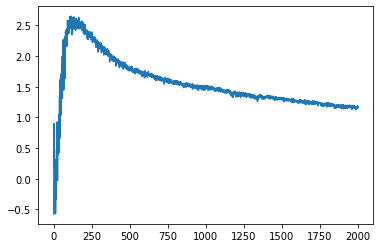

In [5]:
trainer.plot()

Now we can take a look at how the agent is performing:

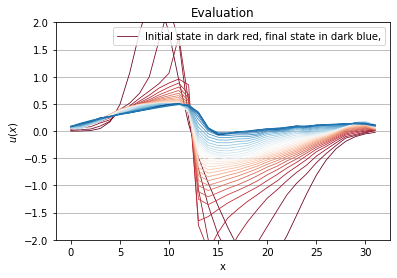

In [11]:
env = trainer.env

obs = env.reset()
bplt.burgers_figure('Evaluation')
plt.plot(obs[0][:,0], color=bplt.gradient_color(0, step_count+1), linewidth=0.8)
plt.legend(['Initial state in dark red, final state in dark blue,'])
plt.ylim(-2, 2)
for frame in range(1, step_count):
    act = trainer.predict(obs, deterministic=True)
    obs, _, _, _ = env.step(act)
    plt.plot(obs[0][:,0], color=bplt.gradient_color(frame, step_count+1), linewidth=0.8)
plt.plot(env.goal_state.velocity.data[0,:,0])

## CFE Chain Initialization

To classify the results of the reinforcement learning method, they are compared to a supervised control force estimator approach using a differentiable solver. This comparison seems natural as both algorithms work by optimizing through trial and error. While the CFE approach has the advantage of the differentiable solver, the reinforcement learning approach is not limited by training dataset size. However, this also introduces additional simulation overhead during training to generate the ground truth trajectories. This can increase training duration.

In [7]:
from control.pde.burgers import BurgersPDE
from control.control_training import ControlTraining
from control.sequences import StaggeredSequence

/home/felix/anaconda3/envs/phiflow/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:516: FutureWarning:

Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.

/home/felix/anaconda3/envs/phiflow/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:517: FutureWarning:

Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.

/home/felix/anaconda3/envs/phiflow/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:518: FutureWarning:

Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.

/home/felix/anaconda3/envs/phiflow/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:519: FutureWarning:

Passing (type, 1) or '1type' as a synonym of type is deprecated; in 

In [8]:
cfe_app = ControlTraining(
    step_count,
    BurgersPDE(domain, viscosity, dt),
    datapath=data_path,
    val_range=val_range,
    train_range=train_range,
    trace_to_channel=lambda trace: 'burgers_velocity',
    obs_loss_frames=[],
    trainable_networks=['CFE'],
    sequence_class=StaggeredSequence,
    batch_size=100,
    view_size=20,
    learning_rate=1e-3,
    learning_rate_half_life=1000,
    dt=dt
).prepare()

NameError: name 'data_path' is not defined

In [ ]:
for i in range(10000):
    supervised_cfe_app.progress()

In [ ]:
# Save model here

In [ ]:
# Load model here

Now let's see how the CFE approach performs:

In [ ]:
states = cfe_app.infer_all_frames(test_range)

bplt.burgers_figure('CFE')
for frame in range(0, step_count+1):
    plt.plot(states[frame].burgers.velocity.data[0,:,0], color=bplt.gradient_color(frame, step_count+1), linewidth=0.8)

## Comparison

In [ ]:
from burgers_fixed_set import BurgersFixedSetEnv

At first, we create a new environment with a fixed data set.

In [ ]:
fixed_set_env = BurgersFixedSetEnv(
    data_path=data_path,
    data_range=test_range,
    num_envs=1,
    step_count=step_count,
    domain=domain,
    dt=dt,
    viscosity=viscosity,
    diffusion_substeps=diffusion_substeps,
    final_reward_factor=final_reward_factor,
    test_mode=True,
)

Next, we load the previously stored PPO agent using the new fixed set environment

In [ ]:
agent = PPO.load(agent_path, fixed_set_env, **ppo_kwargs)

So how about a face-to-face comparison between CFE, RL, GT and the uncontrolled simulation?

In [ ]:
index_in_set = 10

fixed_set_env.dataset_idx = index_in_set
test_set = Dataset.load(data_path, test_range)

cfe_frames = np.array([f.burgers.velocity.data[0] for f in cfe_app.infer_all_frames(test_range)])
gt_frames = np.array(test_set.sources[index_in_set].scene.read_sim_frames(['burgers_velocity'], range(step_count+1))).squeeze(0)

obs = fixed_set_env.reset()

rl_frames = [obs[0]]
pass_frames = [fixed_set_env.pass_state.velocity.data.squeeze(0)]


fig, axs = plt.subplots(2, 2, figsize=(12.8, 9.6))

for idx in [(0, 0), (0, 1), (1, 0), (1, 1)]:    
    axs[idx].set_ylabel("$u(x)$")
    axs[idx].set_xlabel("x")
    axs[idx].grid(True, axis='y')
    axs[idx].set_ylim(-2, 2)

fig.legend(['Initial state in dark red, final state in dark blue.'])

    
for _ in range(step_count):
    act, _ = agent.predict(obs, deterministic=True)
    obs, _, _, _ = fixed_set_env.step(act)
    rl_frames.append(obs[0])
    pass_frames.append(fixed_set_env.pass_state.velocity.data.squeeze(0))

for frame in range(step_count + 1):
    color = bplt.gradient_color(frame, step_count+1)
    axs[0, 0].plot(gt_frames[frame].squeeze(), color=color, linewidth=0.8)
    axs[0, 1].plot(pass_frames[frame].squeeze(), color=color, linewidth=0.8)
    axs[1, 0].plot(cfe_frames[frame].squeeze(), color=color, linewidth=0.8)
    axs[1, 1].plot(rl_frames[frame][:,0], color=color, linewidth=0.8)
